In [1]:
import os
import itertools

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pathlib
from PIL import Image

import cv2
sns.set_style('darkgrid')
import plotly.express as px

In [5]:
train_brain_dataset = "dataset/Training"

data = []

In [6]:
for tumortype in os.listdir(train_brain_dataset):
    tumortype_path = os.path.join(train_brain_dataset, tumortype)
    

    for filename in os.listdir(tumortype_path):
        img_path = os.path.join(tumortype_path, filename)
        
        label = tumortype
        
        data.append((img_path, label))

train = pd.DataFrame(data, columns=['image_path', 'label'])

In [7]:
train

image_path       label
0      dataset/Training/pituitary/Tr-pi_0505.jpg   pituitary
1      dataset/Training/pituitary/Tr-pi_0263.jpg   pituitary
2      dataset/Training/pituitary/Tr-pi_0277.jpg   pituitary
3      dataset/Training/pituitary/Tr-pi_1169.jpg   pituitary
4      dataset/Training/pituitary/Tr-pi_0511.jpg   pituitary
...                                          ...         ...
5707  dataset/Training/meningioma/Tr-me_1053.jpg  meningioma
5708  dataset/Training/meningioma/Tr-me_0403.jpg  meningioma
5709  dataset/Training/meningioma/Tr-me_0365.jpg  meningioma
5710  dataset/Training/meningioma/Tr-me_0371.jpg  meningioma
5711  dataset/Training/meningioma/Tr-me_0417.jpg  meningioma

[5712 rows x 2 columns]

In [8]:
test_brain_dataset = "dataset/Testing"
data = []


for tumortype in os.listdir(test_brain_dataset):
    tumortype_path = os.path.join(test_brain_dataset, tumortype)
    
    
    for filename in os.listdir(tumortype_path):
        img_path = os.path.join(tumortype_path, filename)
    
        
        label = tumortype
        
    
        data.append((img_path, label))


test = pd.DataFrame(data, columns=['image_path', 'label'])
test

image_path       label
0        dataset/Testing/pituitary/Te-pi_0233.jpg   pituitary
1        dataset/Testing/pituitary/Te-pi_0227.jpg   pituitary
2        dataset/Testing/pituitary/Te-pi_0019.jpg   pituitary
3        dataset/Testing/pituitary/Te-pi_0031.jpg   pituitary
4        dataset/Testing/pituitary/Te-pi_0025.jpg   pituitary
...                                           ...         ...
1306    dataset/Testing/meningioma/Te-me_0080.jpg  meningioma
1307    dataset/Testing/meningioma/Te-me_0094.jpg  meningioma
1308    dataset/Testing/meningioma/Te-me_0137.jpg  meningioma
1309    dataset/Testing/meningioma/Te-me_0123.jpg  meningioma
1310  dataset/Testing/meningioma/Te-meTr_0009.jpg  meningioma

[1311 rows x 2 columns]

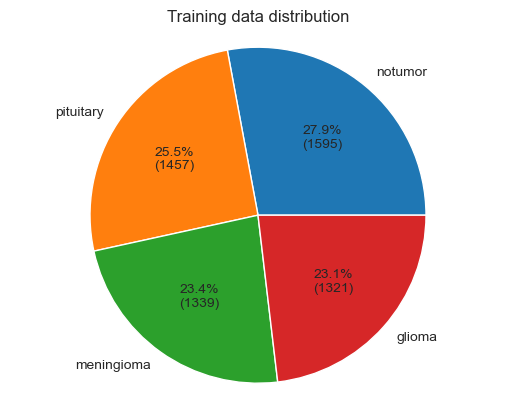

In [9]:
data_distribution = train.label.value_counts()

def custom_autopct(pct):
    total = sum(data_distribution)
    val = int(round(pct*total/100.0))
    return "{:.1f}%\n({:d})".format(pct, val)


# pie chart for data balance
plt.pie(data_distribution, labels = data_distribution.index, autopct=custom_autopct)
plt.title("Training data distribution")
plt.axis("equal")
plt.show()

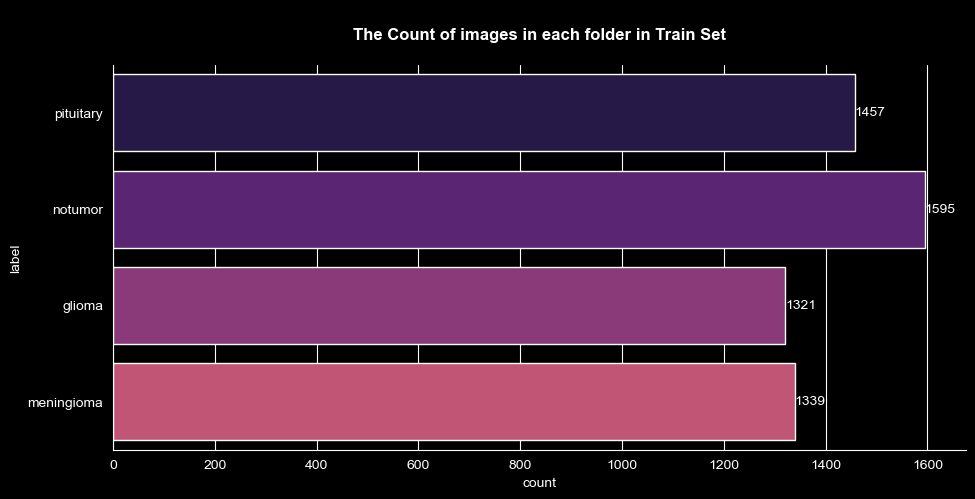

In [10]:

plt.style.use('dark_background')  # Setting dark background style
sns.set_palette('magma')
fig, ax = plt.subplots(figsize=(11, 5), facecolor='black')  # Setting black background

for i in ["top", "right"]:
    ax.spines[i].set_visible(False)

x = sns.countplot(data=train, y=train["label"])

for container in x.containers:
    x.bar_label(container)

plt.title("\nThe Count of images in each folder in Train Set\n", weight="bold", color='white')  # Adjusting title color

plt.show()


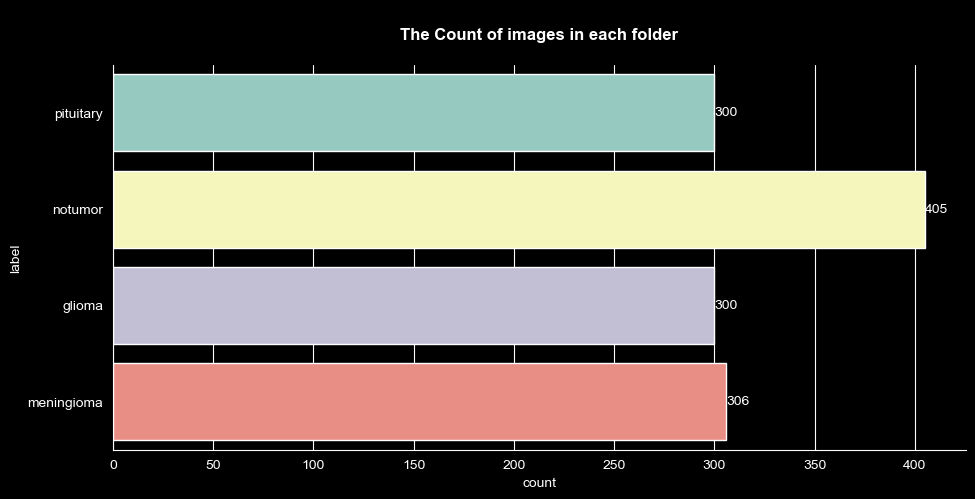

In [11]:
plt.style.use('dark_background')  # Setting dark background style

fig, ax = plt.subplots(figsize=(11, 5), facecolor='black')  # Setting black background

for i in ["top", "right"]:
    ax.spines[i].set_visible(False)

x = sns.countplot(data=test, y=test["label"])

for container in x.containers:
    x.bar_label(container)

plt.title("\nThe Count of images in each folder\n", weight="bold", color='white')  # Adjusting title color

plt.show()


### SPLITING DATA: TRAIN TEST AND VALIDATION

In [12]:
train_data, valid_data = train_test_split(train, test_size=0.2, random_state=42, shuffle = True , stratify=train['label'])

print(f"Training set shape: {train_data.shape}")
print(f"Testing set shape: {test.shape}")
print(f"Validation set shape: {valid_data.shape}")

Training set shape: (4569, 2)
Testing set shape: (1311, 2)
Validation set shape: (1143, 2)


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,  BatchNormalization, Activation, Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

## IMAGE GENERATION

In [14]:
batch_size = 32
image_size = (224, 224)
channels = 3

train_datagen = ImageDataGenerator()

valid_test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    shuffle = True, 
    batch_size=batch_size,
    class_mode='categorical',  
    color_mode = 'rgb'
)

valid_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=valid_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    shuffle = True, 
    batch_size=batch_size,class_mode='categorical',
    color_mode = 'rgb'
)

test_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    shuffle=False,  
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = 'rgb'
)

Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


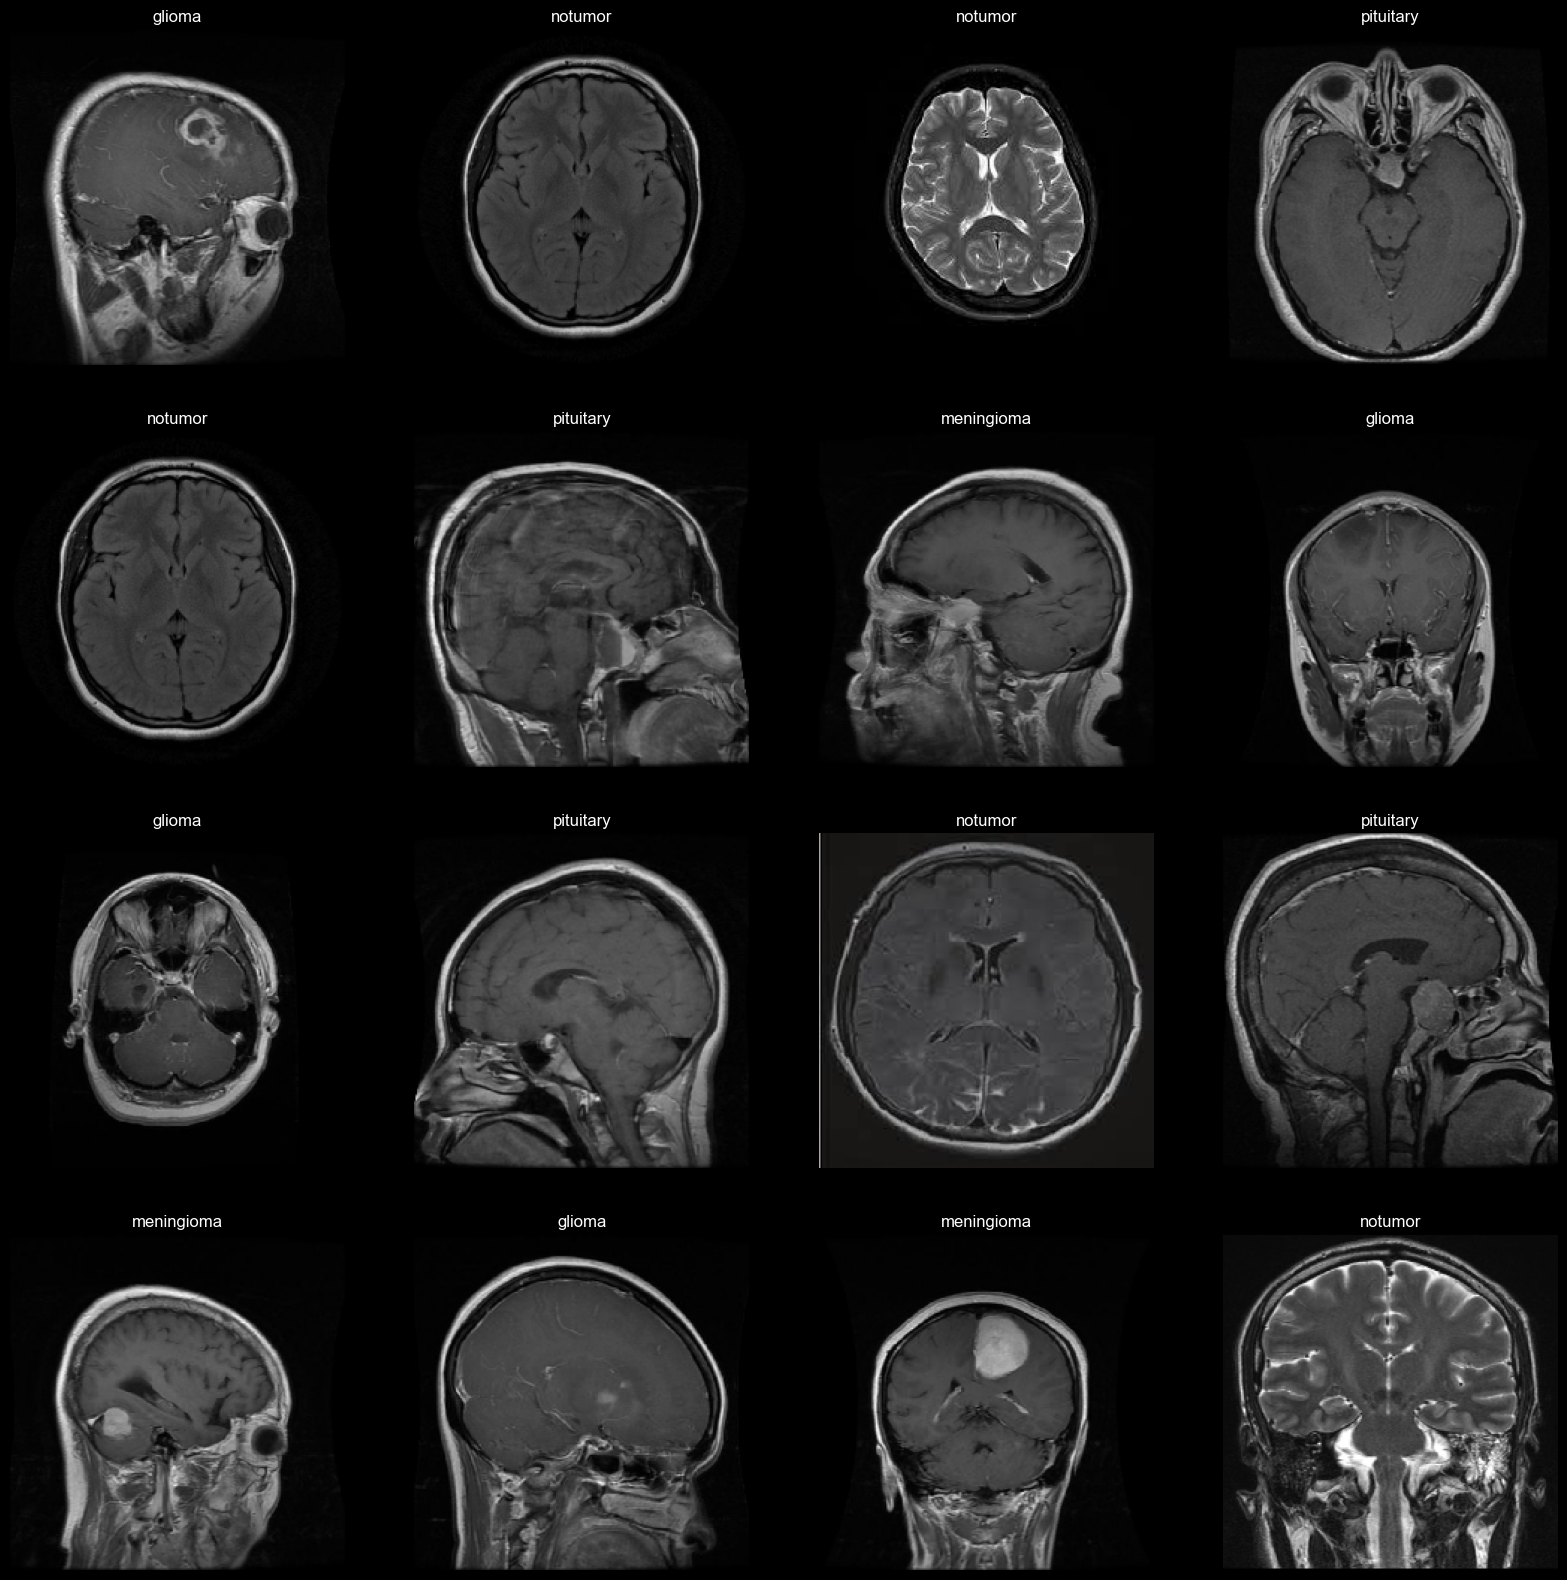

In [15]:
g_dict = train_generator.class_indices      
classes = list(g_dict.keys())       
images, labels = next(train_generator)      

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'white', fontsize= 12)
    plt.axis('off')
plt.show()



In [16]:
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [17]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


### MODEL 1 CNN

In [46]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', 
                 activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))

model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 flatten_1 (Flatten)         (None, 401408)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               102760704 
                                                      

In [47]:
epochs = 20 
history = model.fit(x= train_generator, epochs= epochs, verbose= 1, validation_data= valid_generator, 
                    validation_steps= None, shuffle= False)

Epoch 1/20


143/143 [==============================] - 254s 2s/step - loss: 70.3476 - accuracy: 0.7279 - val_loss: 0.5932 - val_accuracy: 0.8504
Epoch 2/20
143/143 [==============================] - 442s 3s/step - loss: 0.4413 - accuracy: 0.8860 - val_loss: 0.4337 - val_accuracy: 0.8854
Epoch 3/20
143/143 [==============================] - 785s 6s/step - loss: 0.2317 - accuracy: 0.9317 - val_loss: 0.3441 - val_accuracy: 0.9073
Epoch 4/20
143/143 [==============================] - 770s 5s/step - loss: 0.1460 - accuracy: 0.9586 - val_loss: 0.3432 - val_accuracy: 0.9178
Epoch 5/20
143/143 [==============================] - 263s 2s/step - loss: 0.0762 - accuracy: 0.9766 - val_loss: 0.3822 - val_accuracy: 0.9265
Epoch 6/20
143/143 [==============================] - 262s 2s/step - loss: 0.0628 - accuracy: 0.9858 - val_loss: 0.3578 - val_accuracy: 0.9230
Epoch 7/20
143/143 [==============================] - 238s 2s/step - loss: 0.0351 - accuracy: 0.9917 - val_loss: 0.3714 - val_accuracy: 0.9

In [51]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

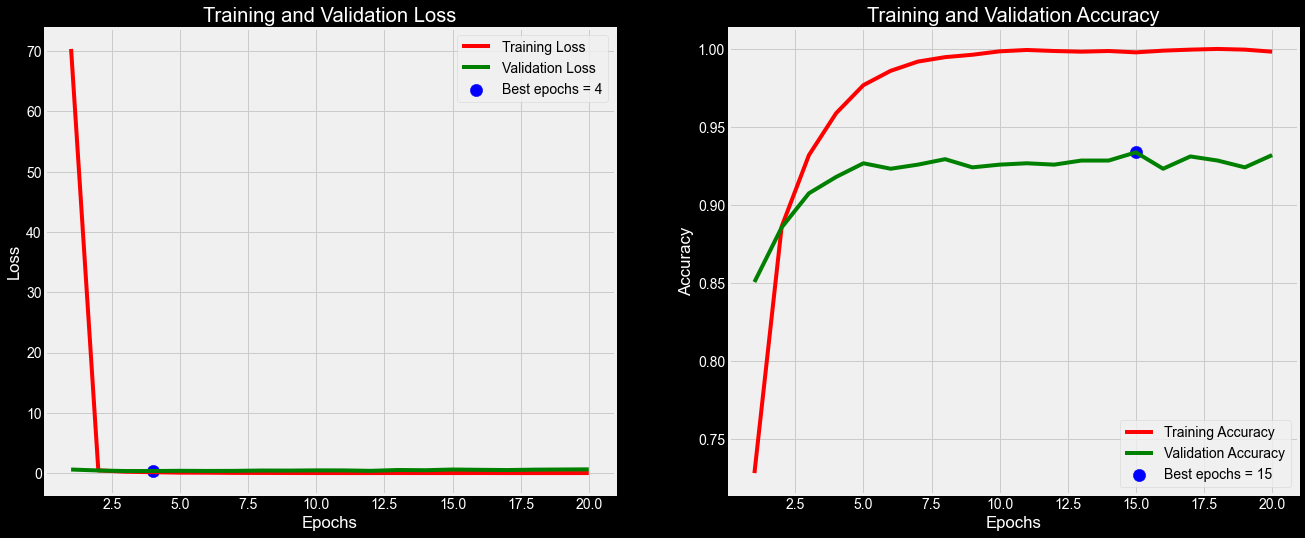

In [62]:
plt.style.use('dark_background')
plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')


plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')

plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')

plt.tight_layout
plt.show();

In [57]:
train_score = model.evaluate(train_generator)
print(f"Training Loss: {train_score[0]}")
print(f"Training Accuracy: {train_score[1]}")

valid_score = model.evaluate(valid_generator)
print(f"Validation Loss: {valid_score[0]}")
print(f" Validation Accuracy: {valid_score[1]}")
test_score = model.evaluate(test_generator)
print(f"Test Loss: {test_score[0]}")
print(f"Test Accuracy: {test_score[1]}")

143/143 [==============================] - 55s 386ms/step - loss: 1.1953e-04 - accuracy: 1.0000
Training Loss: 0.00011952787463087589
Training Accuracy: 1.0
36/36 [==============================] - 15s 414ms/step - loss: 0.6227 - accuracy: 0.9318
Validation Loss: 0.6227339506149292
 Validation Accuracy: 0.9317585229873657
41/41 [==============================] - 17s 400ms/step - loss: 0.5739 - accuracy: 0.9268
Test Loss: 0.5738648772239685
Test Accuracy: 0.9267734289169312


In [63]:
preds = model.predict_generator(test_generator)

y_pred = np.argmax(preds , axis = 1)

C:\Users\hp\AppData\Local\Temp\ipykernel_13104\3780023274.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


### CONFUSION MATRIX

In [94]:
ts_length = len(test)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_generator, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_generator, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_generator, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

19/19 [==============================] - 15s 807ms/step - loss: 0.2555 - accuracy: 0.9720
Train Loss:  0.17382602393627167
Train Accuracy:  1.0
--------------------
Validation Loss:  0.209243044257164
Validation Accuracy:  0.9884868264198303
--------------------
Test Loss:  0.2555175721645355
Test Accuracy:  0.9720394611358643


In [95]:
preds = model.predict_generator(test_generator)
y_pred = np.argmax(preds, axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_13104\3633613801.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


C:\Users\hp\AppData\Local\Temp\ipykernel_13104\1908113636.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


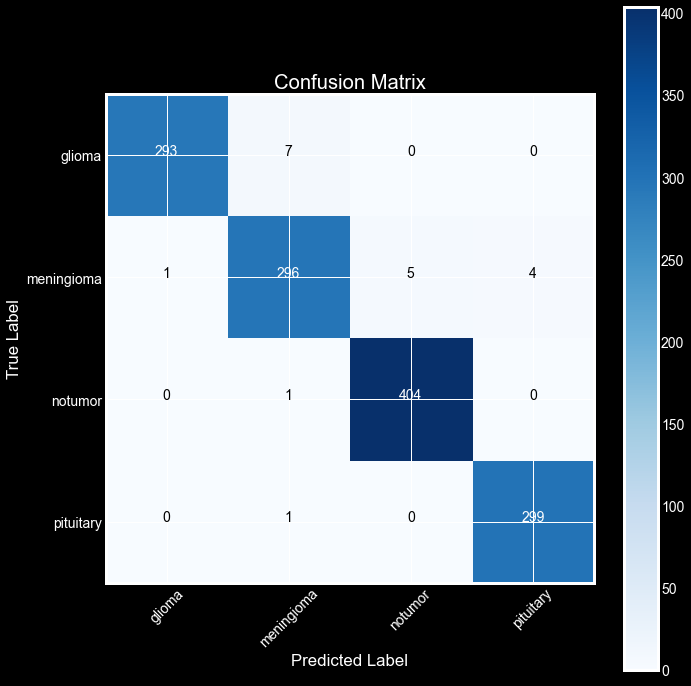

In [97]:
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.style.use('dark_background')

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [99]:
print(classification_report(test_generator.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       1.00      0.98      0.99       300
  meningioma       0.97      0.97      0.97       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.99      1.00      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.98      0.98      1311
weighted avg       0.99      0.99      0.99      1311



1/1 [==============================] - 0s 79ms/step


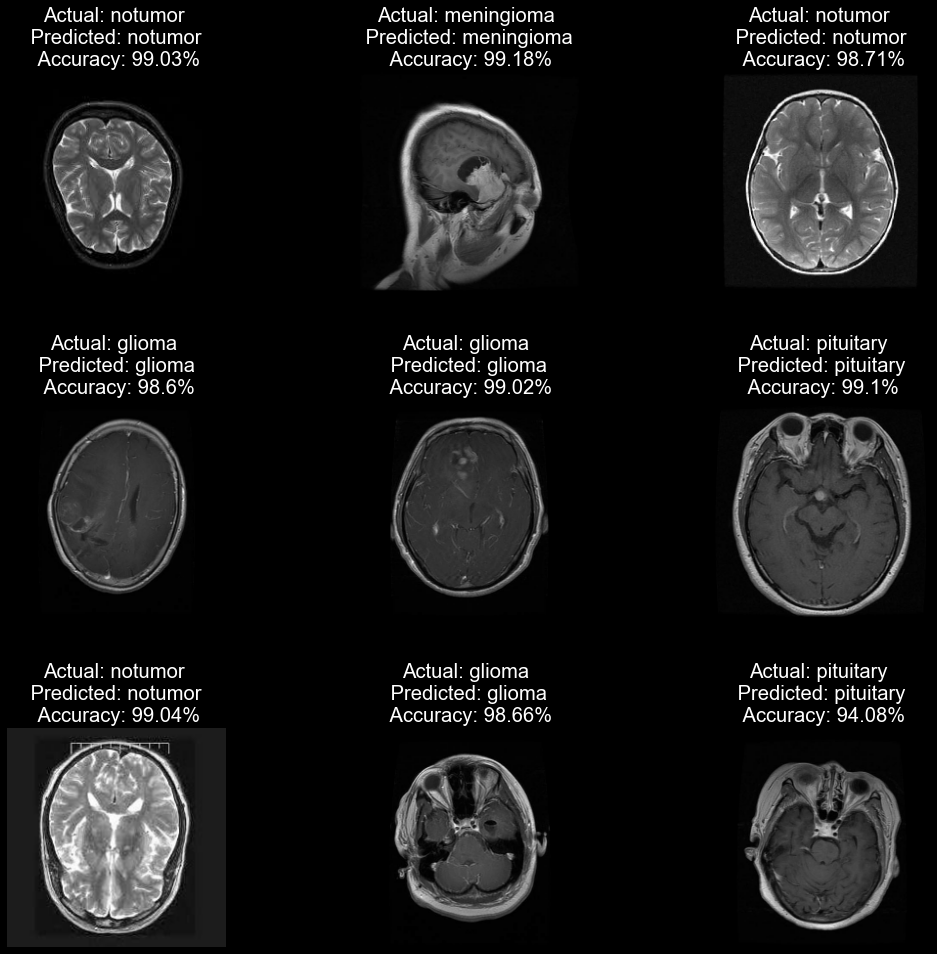

In [100]:
plt.figure(figsize = (15,15))
plt.style.use('dark_background')
for images, labels in true_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Accuracy: {confidence}%")
        plt.axis("off")
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [102]:
scores = model.evaluate(test_generator)

41/41 [==============================] - 31s 744ms/step - loss: 0.2123 - accuracy: 0.9855


In [105]:
for images, labels in true_test_ds.take(1):
    for i in range(32):
        
    
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = test_classes[labels[i]]
        
        print(f"Actual: {actual_class}, Predicted: {predicted_class}, Accuracy: {confidence}% \n")
    

1/1 [==============================] - 0s 76ms/step
Actual: pituitary, Predicted: pituitary, Accuracy: 98.89% 

1/1 [==============================] - 0s 81ms/step
Actual: glioma, Predicted: glioma, Accuracy: 98.13% 

1/1 [==============================] - 0s 78ms/step
Actual: notumor, Predicted: notumor, Accuracy: 98.73% 

1/1 [==============================] - 0s 83ms/step
Actual: notumor, Predicted: notumor, Accuracy: 98.94% 

1/1 [==============================] - 0s 87ms/step
Actual: notumor, Predicted: notumor, Accuracy: 95.27% 

1/1 [==============================] - 0s 80ms/step
Actual: meningioma, Predicted: meningioma, Accuracy: 98.18% 

1/1 [==============================] - 0s 78ms/step
Actual: meningioma, Predicted: meningioma, Accuracy: 99.44% 

1/1 [==============================] - 0s 89ms/step
Actual: notumor, Predicted: notumor, Accuracy: 99.02% 

1/1 [==============================] - 0s 83ms/step
Actual: glioma, Predicted: meningioma, Accuracy: 84.03% 

1/1 [=======

### MODEL 3 INCEPTION

In [52]:
from tensorflow.keras.layers import Flatten

img_shape = (224, 224, 3)

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling='max'
)

model1 = Sequential()
model1.add(base_model)
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(rate=0.25))
model1.add(Dense(4, activation='softmax'))
model1.build((None,) + img_shape)
model1.compile(
    optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model1.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,419,436 (81.71 MB)

 Trainable params: 21,364,908 (81.50 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [20]:
historyy=model1.fit(x=train_generator,epochs=10,validation_data=valid_generator,shuffle=False)

Epoch 1/10


C:\Users\hp\anaconda3\anaconda1\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 1106s 8s/step - accuracy: 0.4099 - loss: 1.2924 - val_accuracy: 0.8679 - val_loss: 0.6781
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1758s 12s/step - accuracy: 0.9024 - loss: 0.4169 - val_accuracy: 0.9484 - val_loss: 0.1507
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1243s 9s/step - accuracy: 0.9738 - loss: 0.1066 - val_accuracy: 0.9668 - val_loss: 0.1191
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1055s 7s/step - accuracy: 0.9906 - loss: 0.0365 - val_accuracy: 0.9668 - val_loss: 0.1193
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1026s 7s/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 0.9773 - val_loss: 0.0840
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1055s 7s/step - accuracy: 0.9947 - loss: 0.0236 - val_accuracy: 0.9781 - val_loss: 0.1310
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1038s 7s/step - accuracy: 0.9989 - loss: 0.0075 - val_accuracy: 0.9755 - val_loss: 0.1094
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1031s 7s/step - accuracy: 0.9989 - loss: 0.0066 - val_accura

In [31]:
historyy.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<Figure size 1440x576 with 0 Axes>

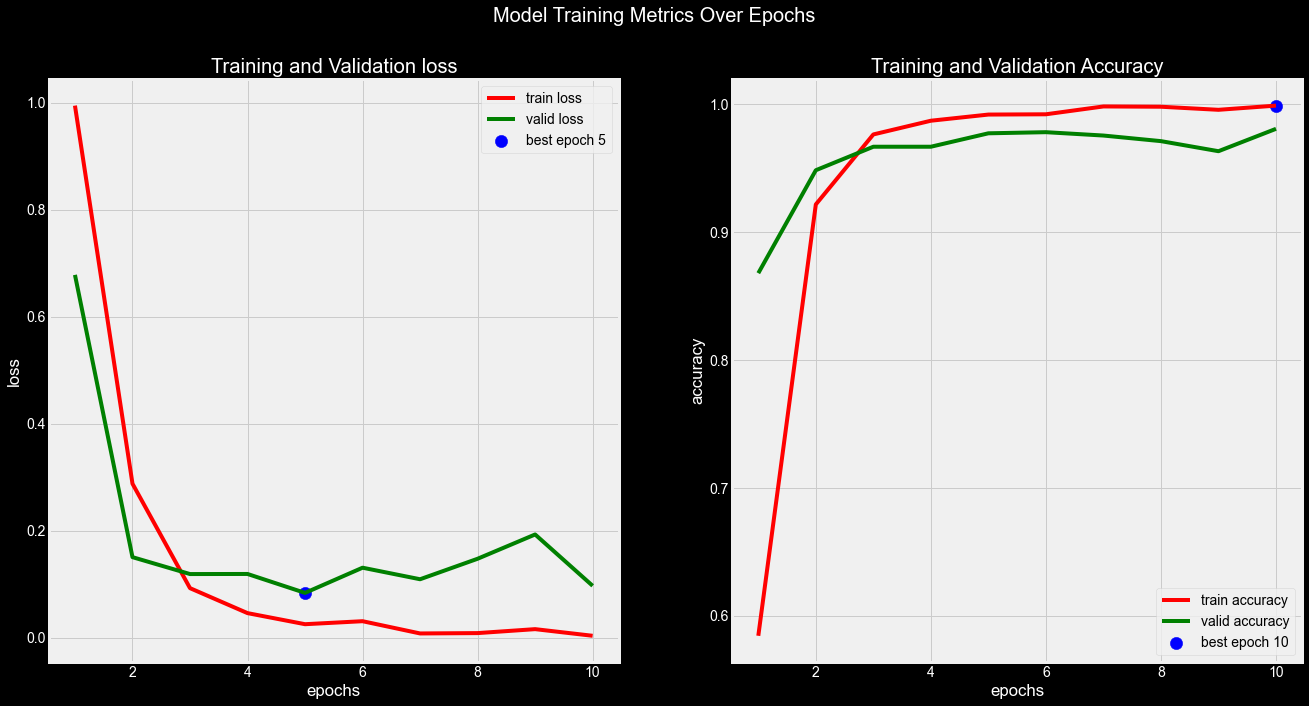

In [39]:
plt.style.use('dark_background')
plt.figure(figsize=(20, 8))
tr_loss=historyy.history["loss"]
val_loss=historyy.history["val_loss"]
index_loss=np.argmin(val_loss)
loss_lowest=val_loss[index_loss]
l_label=f"best epoch {index_loss+1}"

tr_accuracy=historyy.history["accuracy"]
val_accuracy=historyy.history["val_accuracy"]
index_acc=np.argmax(val_accuracy)
acc_highest=tr_accuracy[index_acc]
c_label=f"best epoch {index_acc+1}"

epochs=[i+1 for i in range (len(tr_accuracy))]


plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs,tr_loss,"r",label="train loss")
plt.plot(epochs,val_loss,"g",label="valid loss")
plt.scatter(index_loss+1,loss_lowest,c="b",s=150,label=l_label)
plt.title('Training and Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')


plt.subplot(1, 2, 2)
plt.plot(epochs,tr_accuracy,"r",label="train accuracy")
plt.plot(epochs,val_accuracy,"g",label="valid accuracy")
plt.scatter(index_acc+1,acc_highest,c="b",s=150,label=c_label)
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')

plt.suptitle('Model Training Metrics Over Epochs', fontsize=20);

In [40]:
train_score=model1.evaluate(train_generator)
valid_score=model1.evaluate(valid_generator)
test_score=model1.evaluate(test_generator)

print(f"Train Loss : {train_score[0]:.3f}")
print(f"Train Accuracy : {train_score[1]*100:.2f}%")
print("-"*20)
print(f"Validation Loss : {valid_score[0]:.3f}")
print(f"Validation Accuracy : {valid_score[1]*100:.2f}%")
print("-"*20)
print(f"Test Loss: {test_score[0]:.3f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

143/143 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.9999 - loss: 5.2972e-04
36/36 ━━━━━━━━━━━━━━━━━━━━ 804s 23s/step - accuracy: 0.9857 - loss: 0.0774


C:\Users\hp\anaconda3\anaconda1\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9820 - loss: 0.1234
Train Loss : 0.001
Train Accuracy : 99.98%
--------------------
Validation Loss : 0.097
Validation Accuracy : 98.08%
--------------------
Test Loss: 0.085
Test Accuracy: 98.70%


### prediction

In [43]:
preds=model1.predict(test_generator)
y_pred=np.argmax(preds,axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step


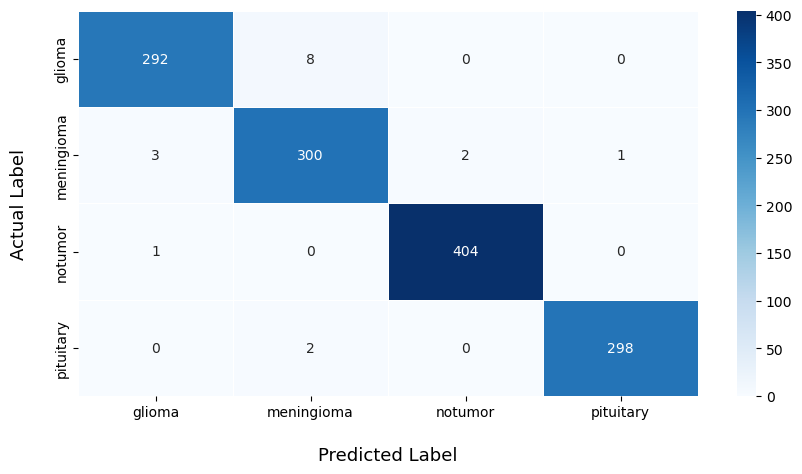

In [45]:
plt.figure(figsize=(10,5))
plt.style.use('default')
cm=confusion_matrix(test_generator.classes,y_pred)
labels = list(test_generator.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);

In [46]:
cr=classification_report(test_generator.classes,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       300
           1       0.97      0.98      0.97       306
           2       1.00      1.00      1.00       405
           3       1.00      0.99      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


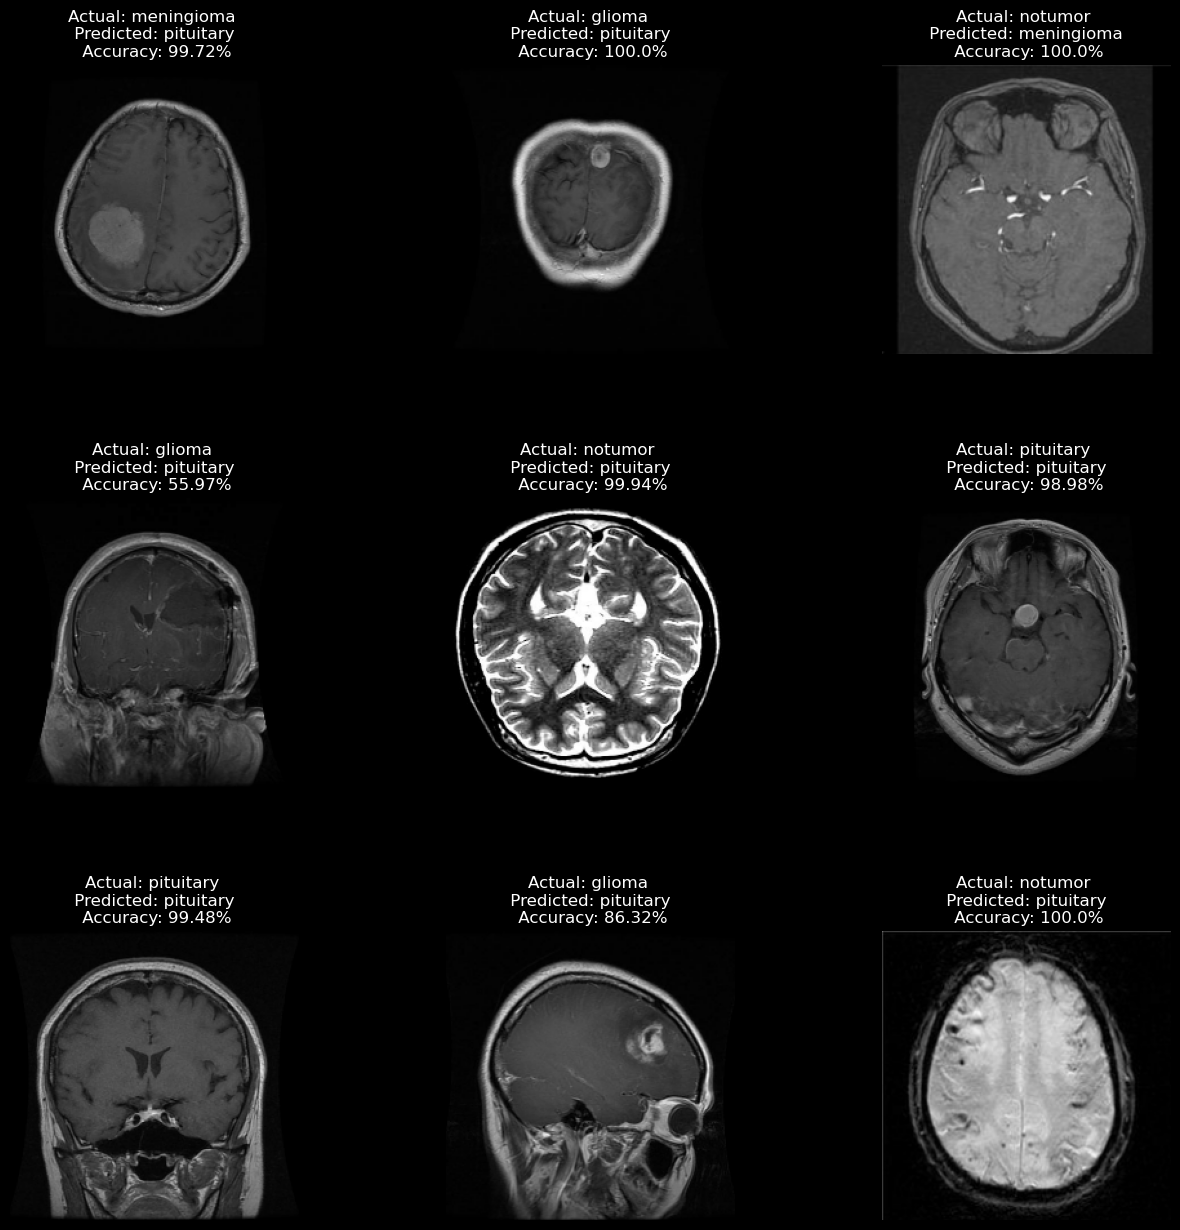

In [58]:
plt.figure(figsize = (15,15))
plt.style.use('dark_background')
for images, labels in true_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model1, images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Accuracy: {confidence}%")
        plt.axis("off")
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [59]:
for images, labels in true_test_ds.take(1):
    for i in range(32):
        
    
        predicted_class, confidence = predict(model1, images[i].numpy())
        actual_class = test_classes[labels[i]]
        
        print(f"Actual: {actual_class}, Predicted: {predicted_class}, Accuracy: {confidence}% \n")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Actual: notumor, Predicted: meningioma, Accuracy: 86.11% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Actual: meningioma, Predicted: meningioma, Accuracy: 74.67% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Actual: meningioma, Predicted: pituitary, Accuracy: 70.37% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Actual: pituitary, Predicted: pituitary, Accuracy: 74.89% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Actual: pituitary, Predicted: pituitary, Accuracy: 99.95% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Actual: meningioma, Predicted: notumor, Accuracy: 91.91% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Actual: pituitary, Predicted: pituitary, Accuracy: 96.81% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Actual: meningioma, Predicted: notumor, Accuracy: 99.4% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Actual: notumor, Predicted: meningioma, Accuracy: 93.97% 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Actual: meningioma, Predicted: pituitary, Accuracy: 88.85% 

1/1 ━━━━━━━━━━━━━━━━━

###  MODEL 4 RESNET

In [63]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

resnet = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling='max'
)


model2 = Sequential()
model2.add(resnet)
model2.add(Flatten())

# Add dense layers with dropout and batch normalization
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(4, activation='softmax'))
model2.build((None,) + img_shape)
optimizer = Adam(learning_rate=0.0001)
model2.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model2.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,772,228 (94.50 MB)

 Trainable params: 24,717,572 (94.29 MB)

 Non-trainable params: 54,656 (213.50 KB)

In [65]:
history1=model2.fit(x=train_generator,epochs=10,validation_data=valid_generator,shuffle=False)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9344s 66s/step - accuracy: 0.9557 - loss: 0.1285 - val_accuracy: 0.7839 - val_loss: 0.7545
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 5177s 36s/step - accuracy: 0.9706 - loss: 0.1068 - val_accuracy: 0.9344 - val_loss: 0.2000
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 918s 6s/step - accuracy: 0.9911 - loss: 0.0352 - val_accuracy: 0.9624 - val_loss: 0.1252
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 898s 6s/step - accuracy: 0.9900 - loss: 0.0318 - val_accuracy: 0.9633 - val_loss: 0.0979
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 892s 6s/step - accuracy: 0.9926 - loss: 0.0258 - val_accuracy: 0.9720 - val_loss: 0.0974
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 4427s 31s/step - accuracy: 0.9947 - loss: 0.0186 - val_accuracy: 0.9685 - val_loss: 0.1096
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 15237s 107s/step - accuracy: 0.9943 - loss: 0.0170 - val_accuracy: 0.9571 - val_loss: 0.1631
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1014s 7s/step - accuracy: 0.9935 - loss: 0.0173

In [66]:
history1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<Figure size 2000x800 with 0 Axes>

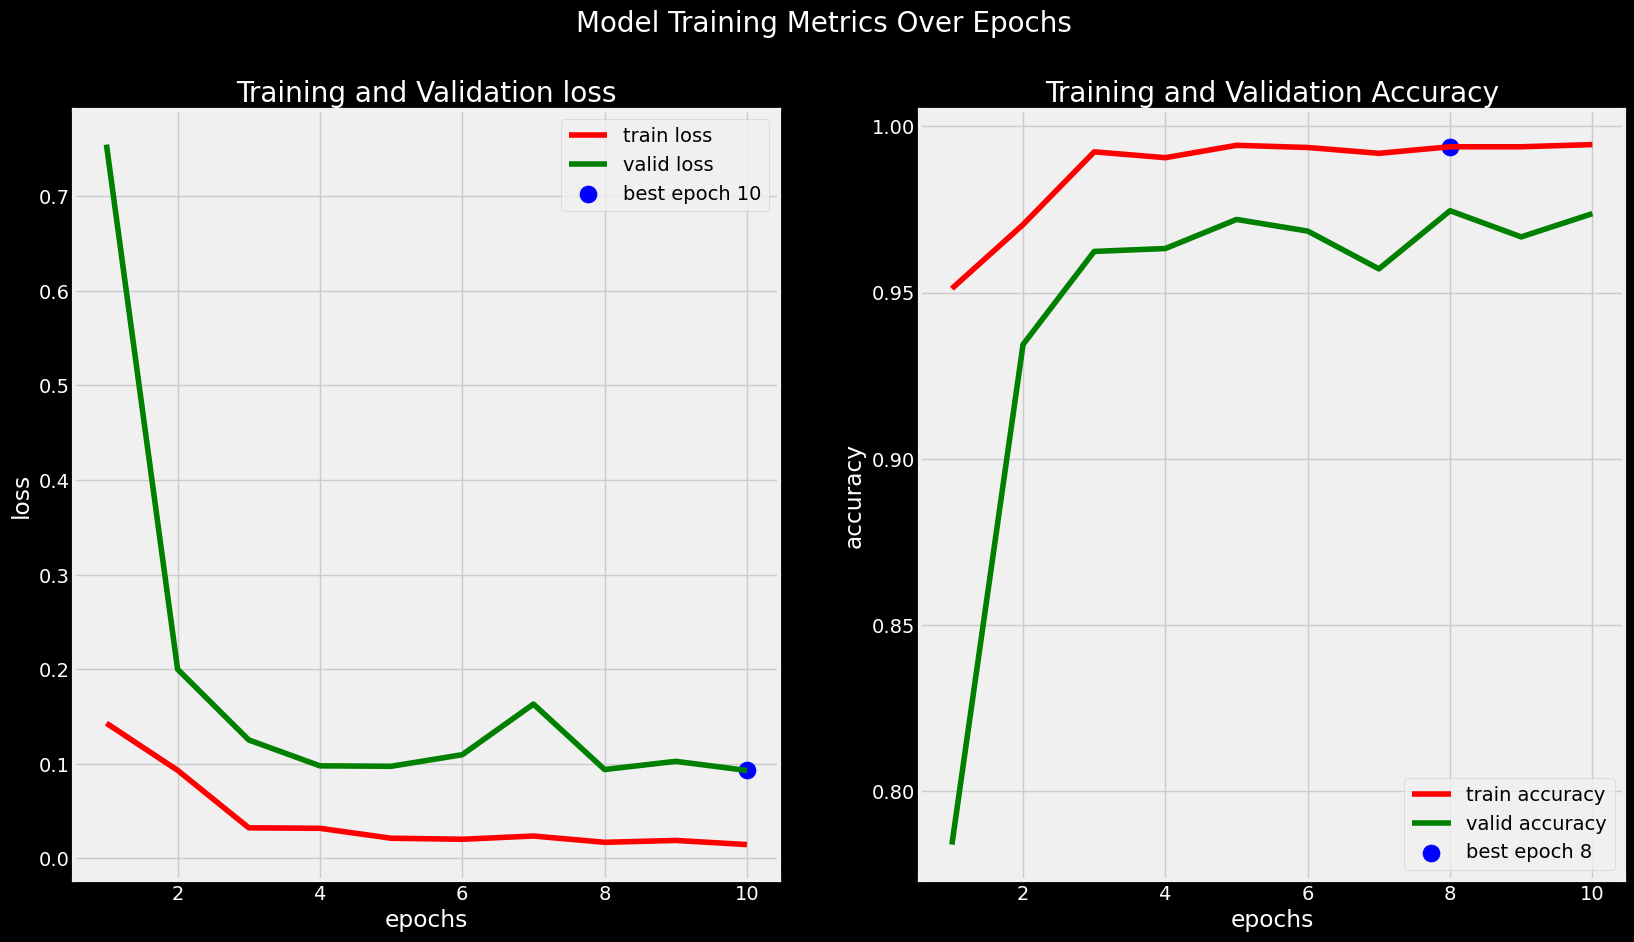

In [67]:
plt.style.use('dark_background')
plt.figure(figsize=(20, 8))
tr_loss=history1.history["loss"]
val_loss=history1.history["val_loss"]
index_loss=np.argmin(val_loss)
loss_lowest=val_loss[index_loss]
l_label=f"best epoch {index_loss+1}"

tr_accuracy=history1.history["accuracy"]
val_accuracy=history1.history["val_accuracy"]
index_acc=np.argmax(val_accuracy)
acc_highest=tr_accuracy[index_acc]
c_label=f"best epoch {index_acc+1}"

epochs=[i+1 for i in range (len(tr_accuracy))]


plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs,tr_loss,"r",label="train loss")
plt.plot(epochs,val_loss,"g",label="valid loss")
plt.scatter(index_loss+1,loss_lowest,c="b",s=150,label=l_label)
plt.title('Training and Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')


plt.subplot(1, 2, 2)
plt.plot(epochs,tr_accuracy,"r",label="train accuracy")
plt.plot(epochs,val_accuracy,"g",label="valid accuracy")
plt.scatter(index_acc+1,acc_highest,c="b",s=150,label=c_label)
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')

plt.suptitle('Model Training Metrics Over Epochs', fontsize=20);

In [68]:
train_score=model2.evaluate(train_generator)
valid_score=model2.evaluate(valid_generator)
test_score=model2.evaluate(test_generator)

print(f"Train Loss : {train_score[0]:.3f}")
print(f"Train Accuracy : {train_score[1]*100:.2f}%")
print("-"*20)
print(f"Validation Loss : {valid_score[0]:.3f}")
print(f"Validation Accuracy : {valid_score[1]*100:.2f}%")
print("-"*20)
print(f"Test Loss: {test_score[0]:.3f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

143/143 ━━━━━━━━━━━━━━━━━━━━ 1917s 13s/step - accuracy: 0.9999 - loss: 0.0010
36/36 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9887 - loss: 0.0447
41/41 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9767 - loss: 0.0787
Train Loss : 0.001
Train Accuracy : 99.98%
--------------------
Validation Loss : 0.094
Validation Accuracy : 97.38%
--------------------
Test Loss: 0.069
Test Accuracy: 98.32%


In [69]:
preds=model2.predict(test_generator)
y_pred=np.argmax(preds,axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step


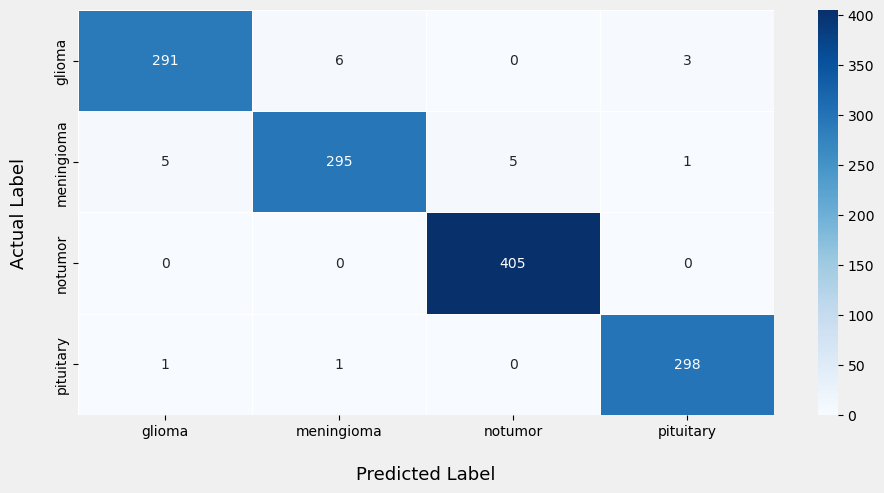

In [70]:
plt.figure(figsize=(10,5))
plt.style.use('default')
cm=confusion_matrix(test_generator.classes,y_pred)
labels = list(test_generator.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);

In [71]:
cr1=classification_report(test_generator.classes,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       300
           1       0.97      0.98      0.97       306
           2       1.00      1.00      1.00       405
           3       1.00      0.99      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


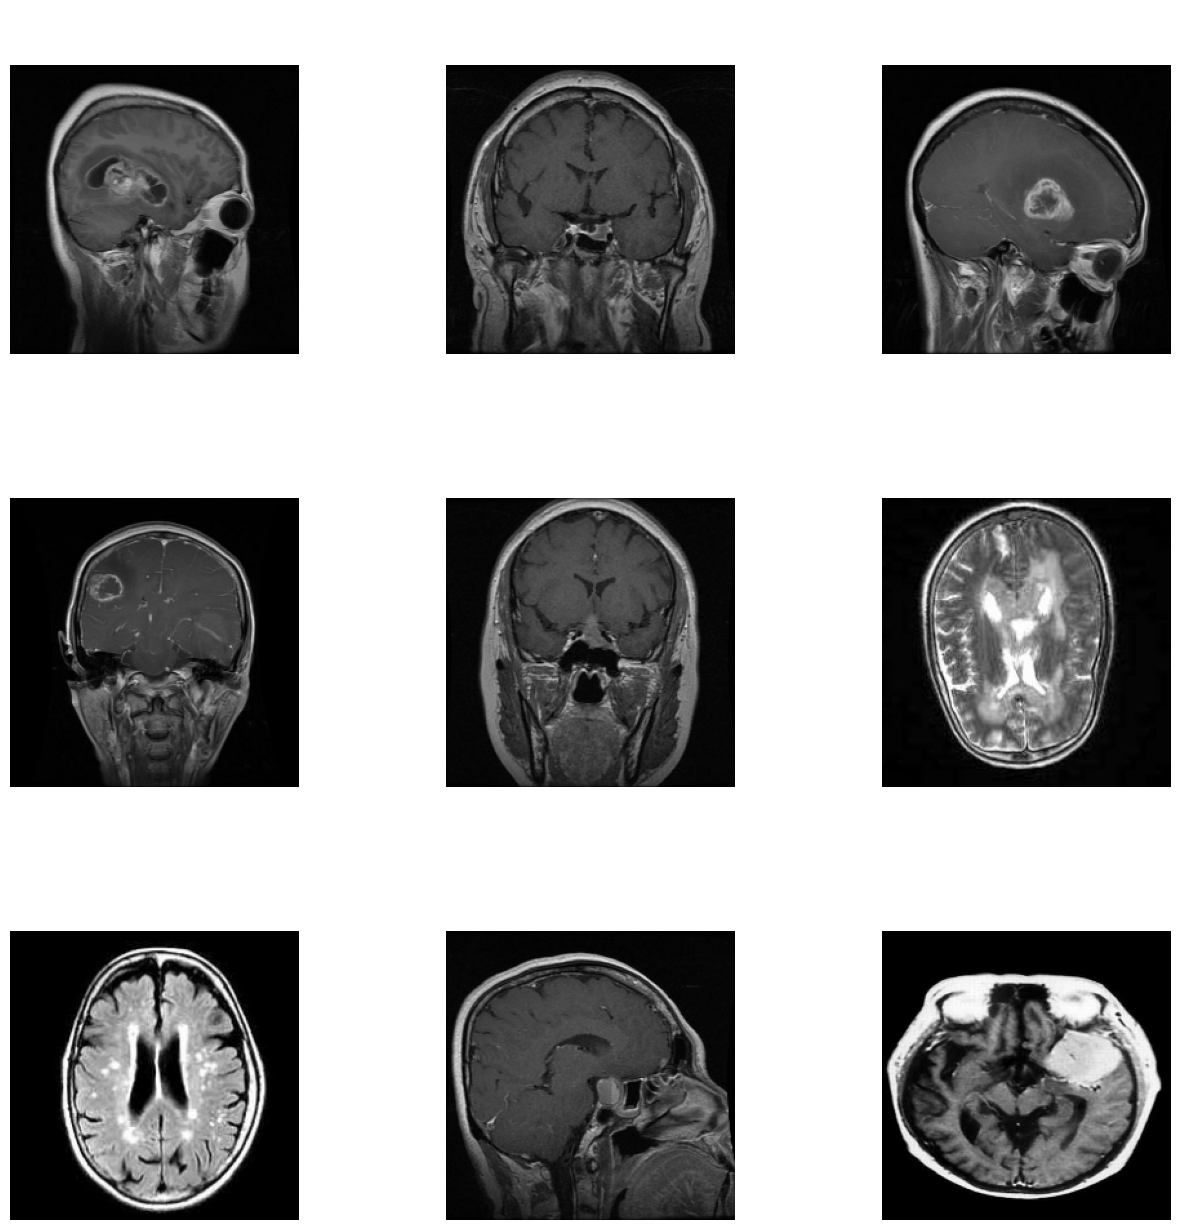

In [72]:
plt.figure(figsize = (15,15))
plt.style.use('dark_background')
for images, labels in true_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model2, images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Accuracy: {confidence}%")
        plt.axis("off")
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

## DENSENET CUSTOM

In [28]:
import tensorflow as tf

def DenseNet(input_shape, num_classes, growth_rate=32, num_dense_blocks=2):
    inputs = tf.keras.layers.Input(shape=input_shape)
    
    # Initial Convolution Layer
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same')(x)
    
    # Dense Blocks
    for _ in range(num_dense_blocks):
        x = dense_block(x, growth_rate)
        x = transition_layer(x)
    
    # Final Layers
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    # Model instantiation
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

def dense_block(x, growth_rate):
    # Batch Normalization and ReLU
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Convolutional layer
    x = tf.keras.layers.Conv2D(growth_rate, (3, 3), padding='same')(x)
    return x

def transition_layer(x):
    # Batch Normalization and ReLU
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Convolutional layer
    x = tf.keras.layers.Conv2D(x.shape[-1] // 2, (1, 1))(x)
    # Average pooling
    x = tf.keras.layers.AveragePooling2D((2, 2), strides=(2, 2))(x)
    return x

# Create the model
model = DenseNet((224, 224, 3), 4)

# Display model summary
model.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_261 (Conv2D)             │ (None, 112, 112, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_259         │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_260         │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_262 (Conv2D)             │ (None, 56, 56, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_261         │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_263 (Conv2D)             │ (None, 56, 56, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_16            │ (None, 28, 28, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_262         │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_264 (Conv2D)             │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_263         │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_265 (Conv2D)             │ (None, 28, 28, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_17            │ (None, 14, 14, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            6

 Total params: 34,532 (134.89 KB)

 Trainable params: 34,116 (133.27 KB)

 Non-trainable params: 416 (1.62 KB)

In [30]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

In [31]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [33]:
history=model.fit(x=train_generator,epochs=10,validation_data=valid_generator,shuffle=False)

Epoch 1/10


C:\Users\Kanika\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.6054 - loss: 0.9650 - val_accuracy: 0.2913 - val_loss: 2.6995
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.7501 - loss: 0.6598 - val_accuracy: 0.4759 - val_loss: 1.0690
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.7771 - loss: 0.5751 - val_accuracy: 0.5564 - val_loss: 1.2782
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.7958 - loss: 0.5395 - val_accuracy: 0.6632 - val_loss: 0.8488
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.8170 - loss: 0.4870 - val_accuracy: 0.5013 - val_loss: 1.0767
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.8259 - loss: 0.4780 - val_accuracy: 0.5066 - val_loss: 2.5534
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.8388 - loss: 0.4664 - val_accuracy: 0.4444 - val_loss: 1.8113
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.8587 - loss: 0.4042 - val_accuracy: 0.782

<Figure size 2000x800 with 0 Axes>

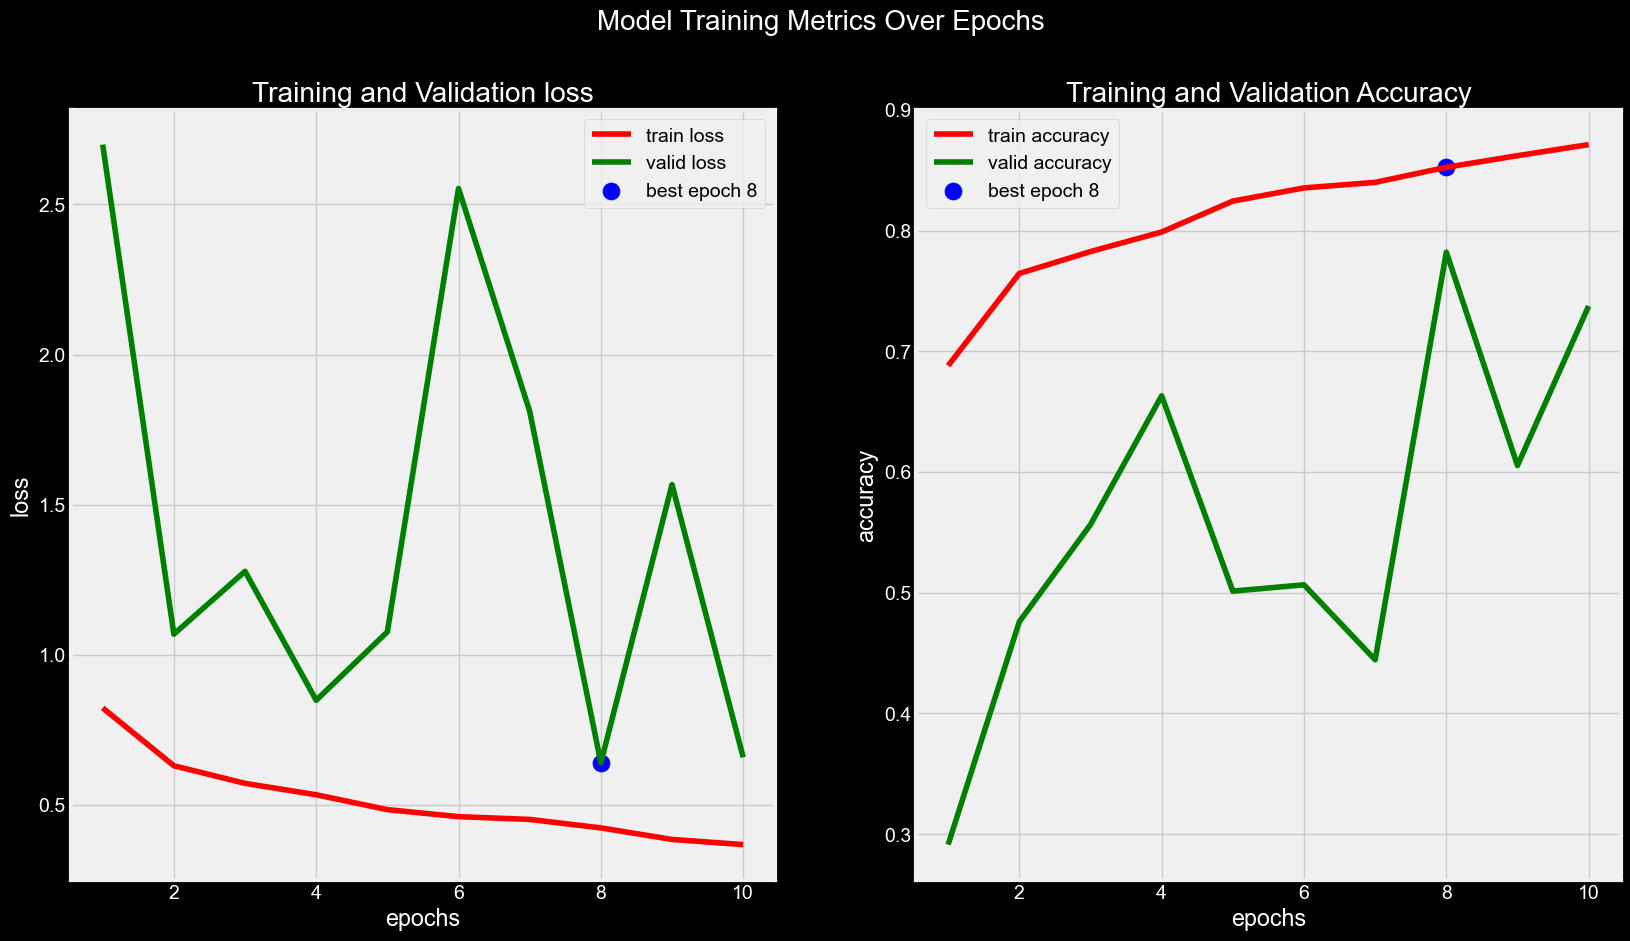

In [34]:
plt.style.use('dark_background')
plt.figure(figsize=(20, 8))
tr_loss=history.history["loss"]
val_loss=history.history["val_loss"]
index_loss=np.argmin(val_loss)
loss_lowest=val_loss[index_loss]
l_label=f"best epoch {index_loss+1}"

tr_accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
index_acc=np.argmax(val_accuracy)
acc_highest=tr_accuracy[index_acc]
c_label=f"best epoch {index_acc+1}"

epochs=[i+1 for i in range (len(tr_accuracy))]


plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs,tr_loss,"r",label="train loss")
plt.plot(epochs,val_loss,"g",label="valid loss")
plt.scatter(index_loss+1,loss_lowest,c="b",s=150,label=l_label)
plt.title('Training and Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')


plt.subplot(1, 2, 2)
plt.plot(epochs,tr_accuracy,"r",label="train accuracy")
plt.plot(epochs,val_accuracy,"g",label="valid accuracy")
plt.scatter(index_acc+1,acc_highest,c="b",s=150,label=c_label)
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')

plt.suptitle('Model Training Metrics Over Epochs', fontsize=20);

In [35]:
train_score=model.evaluate(train_generator)
valid_score=model.evaluate(valid_generator)
test_score=model.evaluate(test_generator)

print(f"Train Loss : {train_score[0]:.3f}")
print(f"Train Accuracy : {train_score[1]*100:.2f}%")
print("-"*20)
print(f"Validation Loss : {valid_score[0]:.3f}")
print(f"Validation Accuracy : {valid_score[1]*100:.2f}%")
print("-"*20)
print(f"Test Loss: {test_score[0]:.3f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 230ms/step - accuracy: 0.7637 - loss: 0.5813
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.7499 - loss: 0.6336


C:\Users\Kanika\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 380ms/step - accuracy: 0.7594 - loss: 0.7369
Train Loss : 0.576
Train Accuracy : 76.17%
--------------------
Validation Loss : 0.659
Validation Accuracy : 73.75%
--------------------
Test Loss: 0.780
Test Accuracy: 72.16%


In [38]:
preds=model.predict(test_generator)
y_pred=np.argmax(preds,axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step


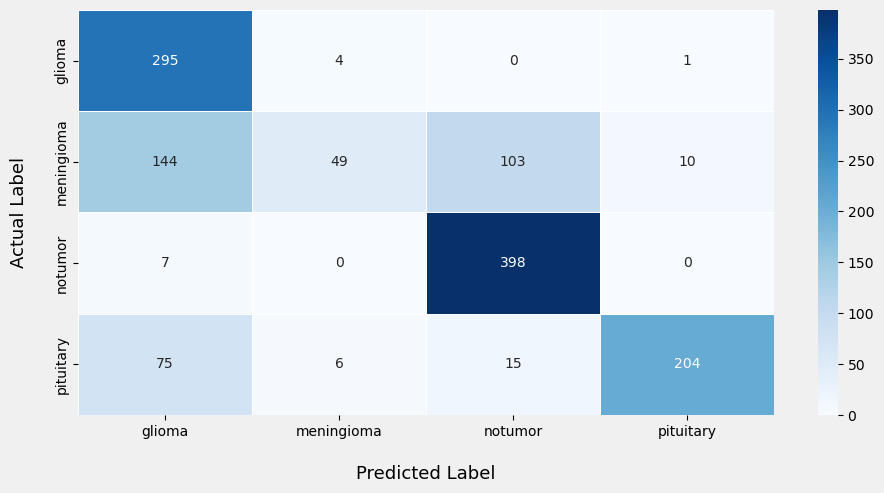

In [39]:
plt.figure(figsize=(10,5))
plt.style.use('default')
cm=confusion_matrix(test_generator.classes,y_pred)
labels = list(test_generator.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);

In [41]:
cr2=classification_report(test_generator.classes,y_pred)
print(cr2)

              precision    recall  f1-score   support

           0       0.57      0.98      0.72       300
           1       0.83      0.16      0.27       306
           2       0.77      0.98      0.86       405
           3       0.95      0.68      0.79       300

    accuracy                           0.72      1311
   macro avg       0.78      0.70      0.66      1311
weighted avg       0.78      0.72      0.68      1311



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


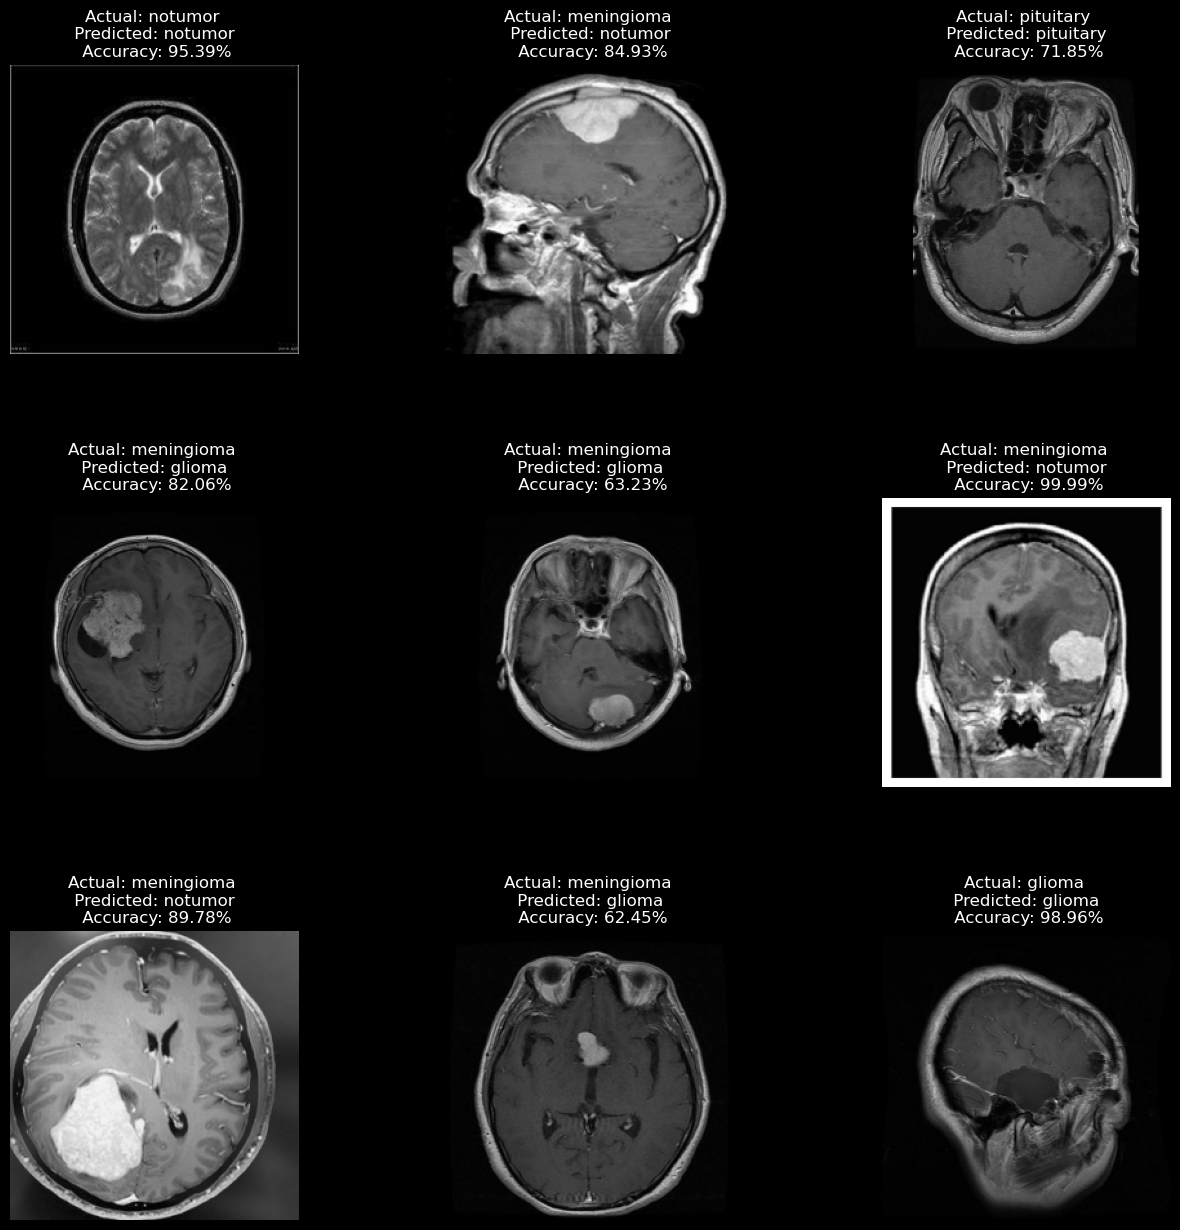

In [48]:
plt.figure(figsize = (15,15))
plt.style.use('dark_background')
for images, labels in true_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Accuracy: {confidence}%")
        plt.axis("off")
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

## VGG 19

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adamax

# Define the image size
image_size = 224

# Load pre-trained VGG19 model without the top (fully connected) layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the layers of the pre-trained VGG19 model
for layer in base_model.layers:
    layer.trainable = False

# Construct the custom model on top of the pre-trained VGG19
model = Sequential()

# Add the VGG19 base model
model.add(base_model)

# Add custom layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()
    

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ ?                      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [60]:
epochs = 10
history = model.fit(x= train_generator, epochs= epochs, verbose= 1, validation_data= valid_generator, 
                    validation_steps= None, shuffle= False)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step - accuracy: 0.9614 - loss: 0.0908 - val_accuracy: 0.9335 - val_loss: 0.1888
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 243ms/step - accuracy: 0.9650 - loss: 0.0805 - val_accuracy: 0.9291 - val_loss: 0.2241
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 258ms/step - accuracy: 0.9710 - loss: 0.0739 - val_accuracy: 0.9361 - val_loss: 0.2114
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 255ms/step - accuracy: 0.9721 - loss: 0.0630 - val_accuracy: 0.9370 - val_loss: 0.2157
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 256ms/step - accuracy: 0.9801 - loss: 0.0545 - val_accuracy: 0.9370 - val_loss: 0.2673
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 39s 270ms/step - accuracy: 0.9744 - loss: 0.0698 - val_accuracy: 0.9370 - val_loss: 0.2450
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 257ms/step - accuracy: 0.9778 - loss: 0.0603 - val_accuracy: 0.9326 - val_loss: 0.2580
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 264ms/step - accuracy: 0.9805 - loss: 0

In [61]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

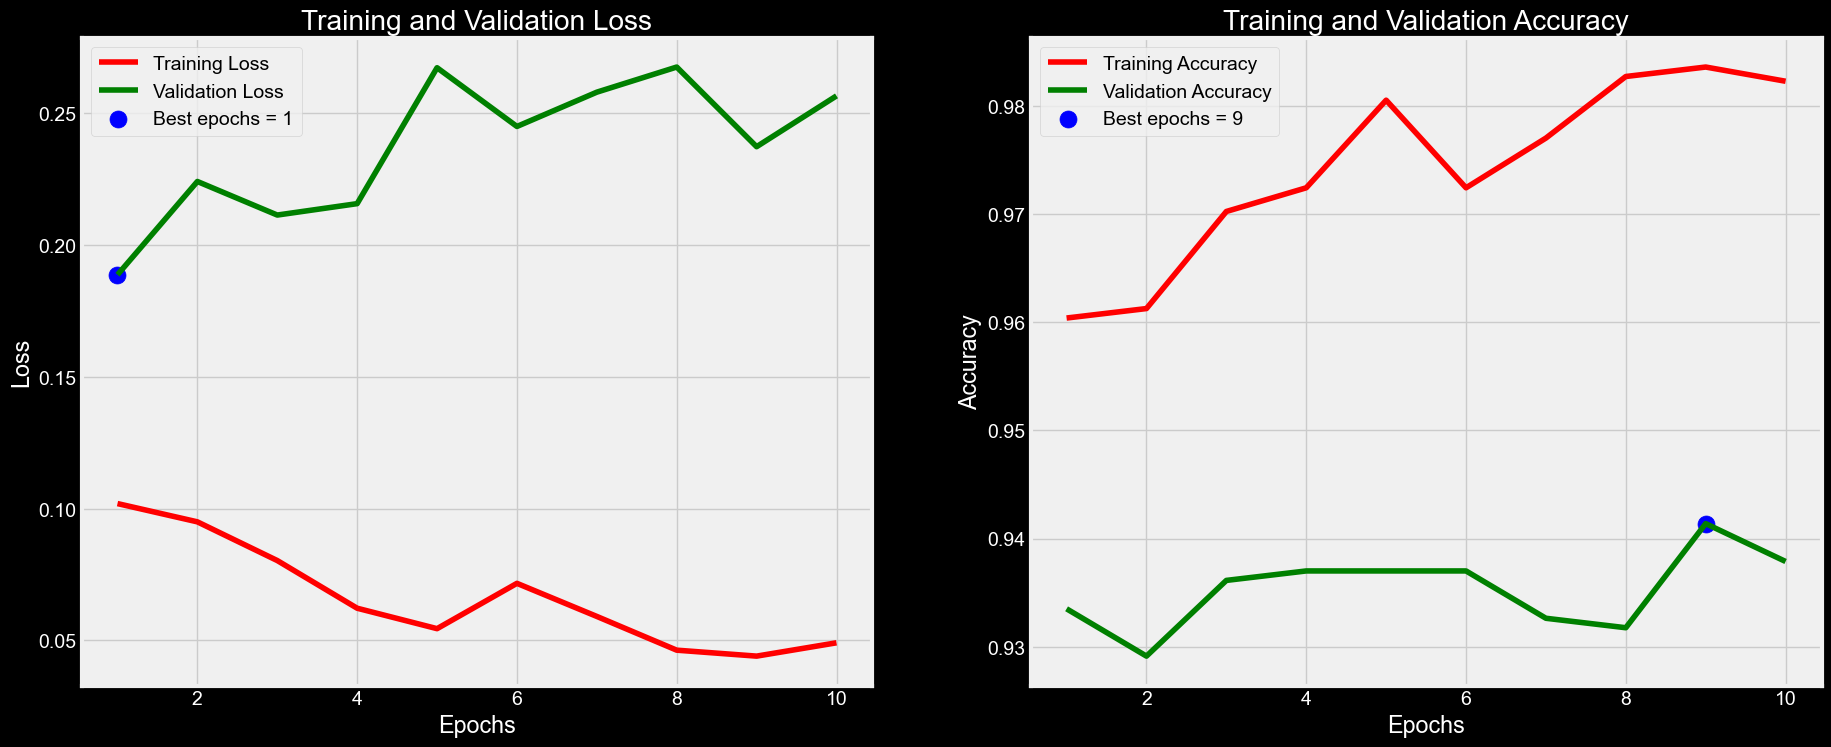

In [62]:
plt.style.use('dark_background')
plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')


plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')

plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')

plt.tight_layout
plt.show();

In [63]:
train_score = model.evaluate(train_generator)
print(f"Training Loss: {train_score[0]}")
print(f"Training Accuracy: {train_score[1]}")

valid_score = model.evaluate(valid_generator)
print(f"Validation Loss: {valid_score[0]}")
print(f" Validation Accuracy: {valid_score[1]}")
test_score = model.evaluate(test_generator)
print(f"Test Loss: {test_score[0]}")
print(f"Test Accuracy: {test_score[1]}")

143/143 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.9986 - loss: 0.0057
Training Loss: 0.005443904548883438
Training Accuracy: 0.9989056587219238
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - accuracy: 0.9282 - loss: 0.3666
Validation Loss: 0.25454264879226685
 Validation Accuracy: 0.9378827810287476
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step - accuracy: 0.9689 - loss: 0.1028
Test Loss: 0.24444907903671265
Test Accuracy: 0.9344012141227722


In [65]:
# Generate predictions using the model
preds = model.predict(test_generator)

# Assuming model predicts class probabilities, convert to class labels
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step


## CONFUSION MATRIX

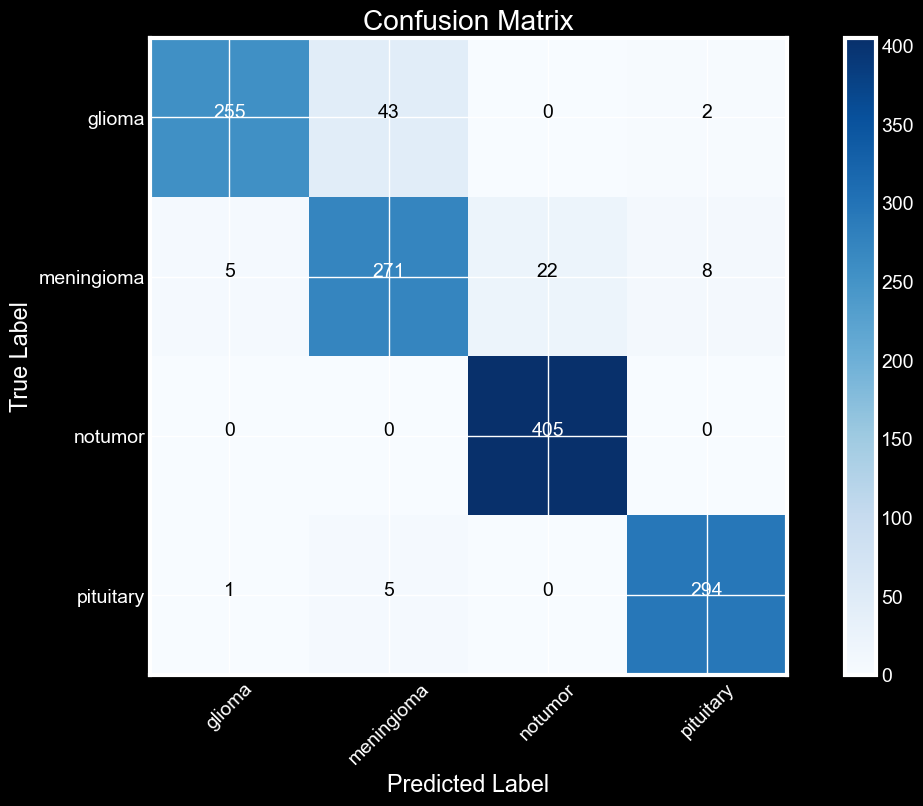

In [66]:
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.style.use('dark_background')
plt.figure(figsize= (12, 8))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [67]:
print(classification_report(test_generator.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      glioma       0.98      0.85      0.91       300
  meningioma       0.85      0.89      0.87       306
     notumor       0.95      1.00      0.97       405
   pituitary       0.97      0.98      0.97       300

    accuracy                           0.93      1311
   macro avg       0.94      0.93      0.93      1311
weighted avg       0.94      0.93      0.93      1311



In [68]:
image_size = 224  # Assuming you want images to be resized to 224x224 pixels
true_test_ds = tf.keras.preprocessing.image_dataset_from_directory (
    test_brain_dataset,
    shuffle = True,
    image_size= (image_size, image_size),
    batch_size = batch_size
)

Found 1311 files belonging to 4 classes.


In [69]:
test_classes = true_test_ds.class_names
test_classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [70]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


2024-04-21 21:59:01.254682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


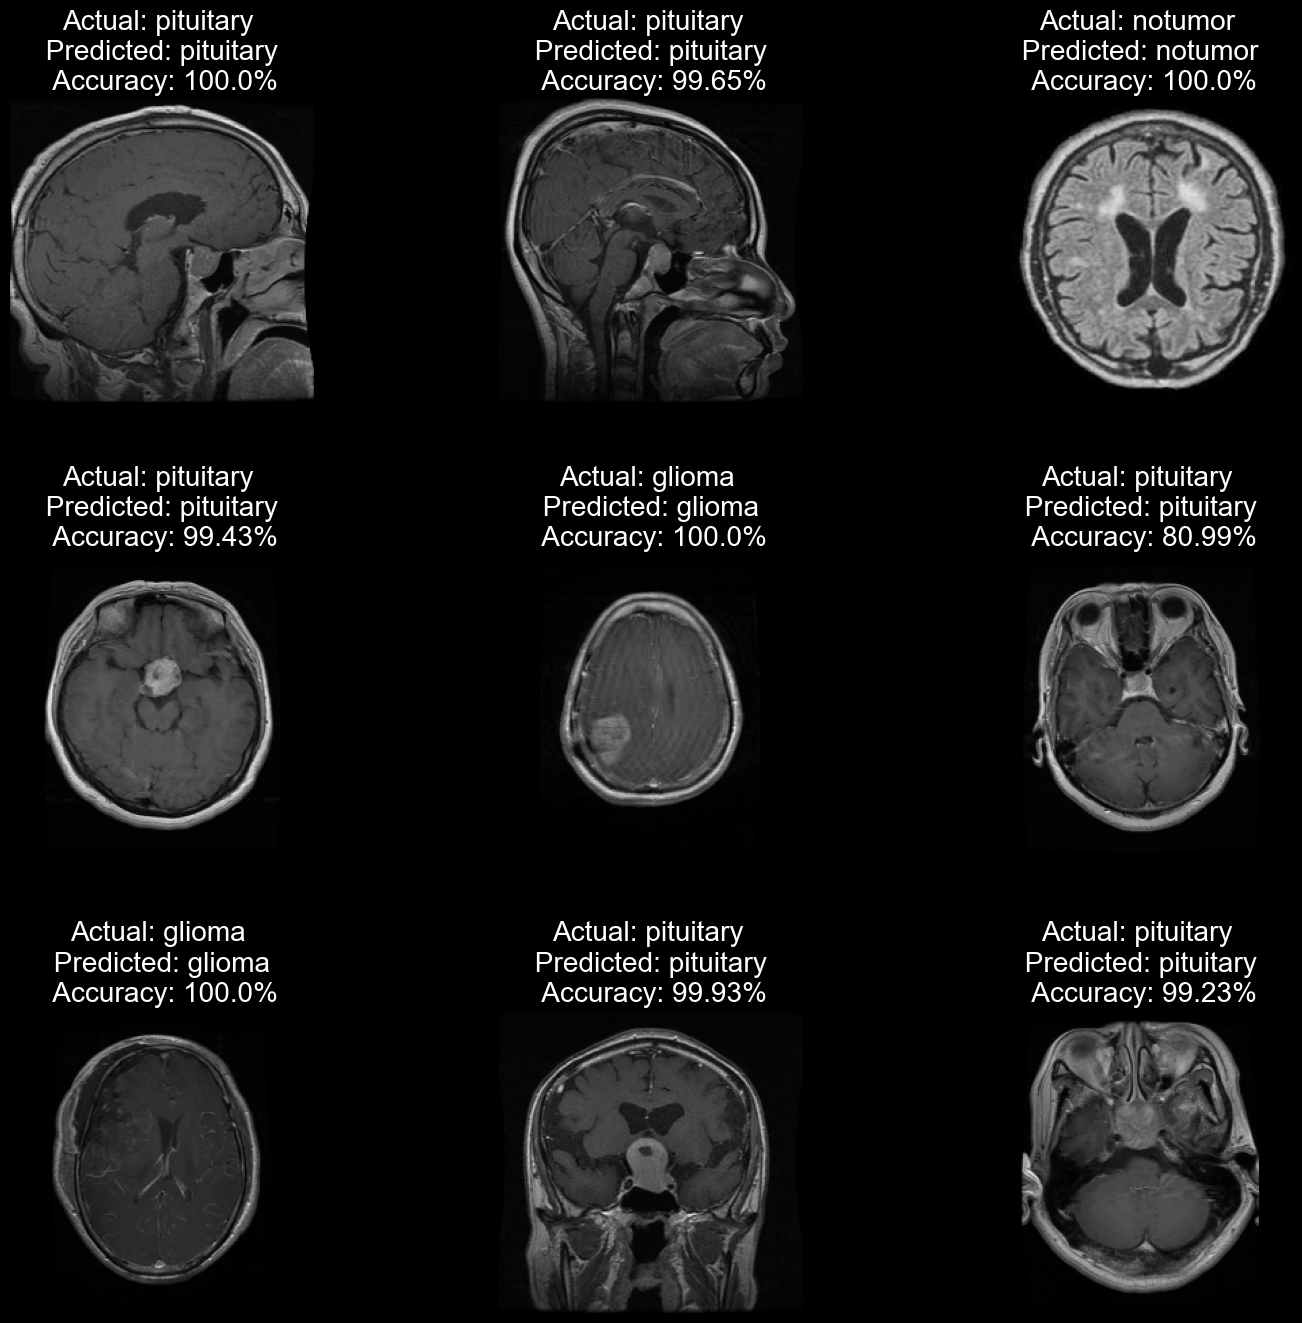

In [71]:
plt.figure(figsize = (15,15))
plt.style.use('dark_background')
for images, labels in true_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Accuracy: {confidence}%")
        plt.axis("off")
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

## MobileNet

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adamax

# Define the image size
image_size = 224

# Load pre-trained MobileNet model without the top (fully connected) layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the layers of the pre-trained MobileNet model
for layer in base_model.layers:
    layer.trainable = False

# Construct the custom model on top of the pre-trained MobileNet
model = Sequential()

# Add the MobileNet base model
model.add(base_model)

# Add custom layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [48]:
epochs = 10
history = model.fit(x= train_generator, epochs= epochs, verbose= 1, validation_data= valid_generator, 
                    validation_steps= None, shuffle= False)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 225ms/step - accuracy: 0.7088 - loss: 4.4507 - val_accuracy: 0.8871 - val_loss: 0.3160
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 236ms/step - accuracy: 0.8830 - loss: 0.3259 - val_accuracy: 0.9003 - val_loss: 0.2793
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 241ms/step - accuracy: 0.8963 - loss: 0.2605 - val_accuracy: 0.9108 - val_loss: 0.2474
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 247ms/step - accuracy: 0.9234 - loss: 0.2089 - val_accuracy: 0.9116 - val_loss: 0.2470
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 257ms/step - accuracy: 0.9236 - loss: 0.2011 - val_accuracy: 0.9134 - val_loss: 0.2504
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - accuracy: 0.9387 - loss: 0.1781 - val_accuracy: 0.9108 - val_loss: 0.2275
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 258ms/step - accuracy: 0.9426 - loss: 0.1437 - val_accuracy: 0.9248 - val_loss: 0.2443
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 248ms/step - accuracy: 0.9475 - loss: 0

In [49]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

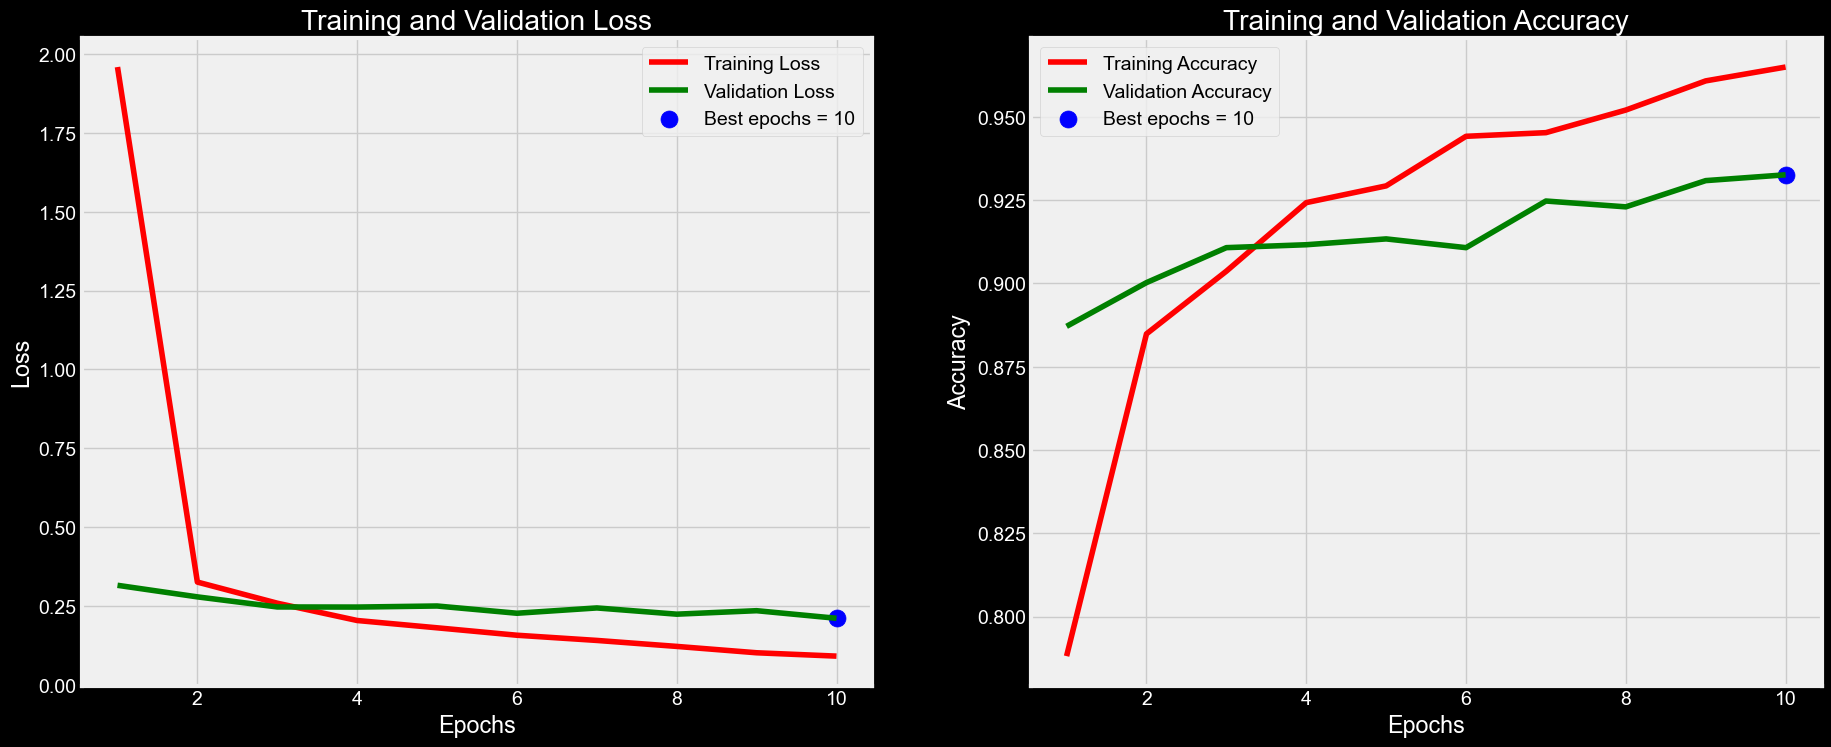

In [50]:
plt.style.use('dark_background')
plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')


plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')

plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')

plt.tight_layout
plt.show();

In [51]:
train_score = model.evaluate(train_generator)
print(f"Training Loss: {train_score[0]}")
print(f"Training Accuracy: {train_score[1]}")

valid_score = model.evaluate(valid_generator)
print(f"Validation Loss: {valid_score[0]}")
print(f" Validation Accuracy: {valid_score[1]}")
test_score = model.evaluate(test_generator)
print(f"Test Loss: {test_score[0]}")
print(f"Test Accuracy: {test_score[1]}")

143/143 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - accuracy: 0.9915 - loss: 0.0331
Training Loss: 0.03517675772309303
Training Accuracy: 0.9901509881019592
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - accuracy: 0.9296 - loss: 0.2087
Validation Loss: 0.21051837503910065
 Validation Accuracy: 0.9326333999633789
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.9710 - loss: 0.0857
Test Loss: 0.1852814257144928
Test Accuracy: 0.9321128726005554


In [53]:
# Generate predictions using the model
preds = model.predict(test_generator)

# Assuming model predicts class probabilities, convert to class labels
y_pred = np.argmax(preds, axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step


## CONFUSION MATRIX

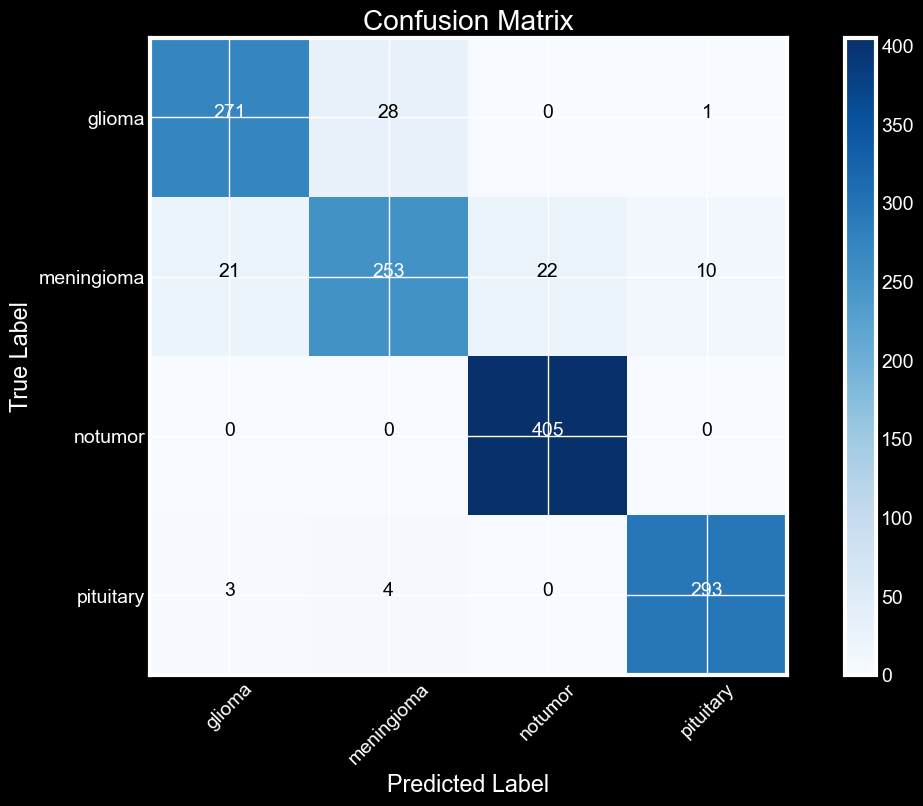

In [54]:
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.style.use('dark_background')
plt.figure(figsize= (12, 8))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [55]:
print(classification_report(test_generator.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      glioma       0.92      0.90      0.91       300
  meningioma       0.89      0.83      0.86       306
     notumor       0.95      1.00      0.97       405
   pituitary       0.96      0.98      0.97       300

    accuracy                           0.93      1311
   macro avg       0.93      0.93      0.93      1311
weighted avg       0.93      0.93      0.93      1311



In [56]:
image_size = 224  # Assuming you want images to be resized to 224x224 pixels
true_test_ds = tf.keras.preprocessing.image_dataset_from_directory (
    test_brain_dataset,
    shuffle = True,
    image_size= (image_size, image_size),
    batch_size = batch_size
)

Found 1311 files belonging to 4 classes.


In [57]:
test_classes = true_test_ds.class_names
test_classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [58]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


2024-04-21 21:50:22.220581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


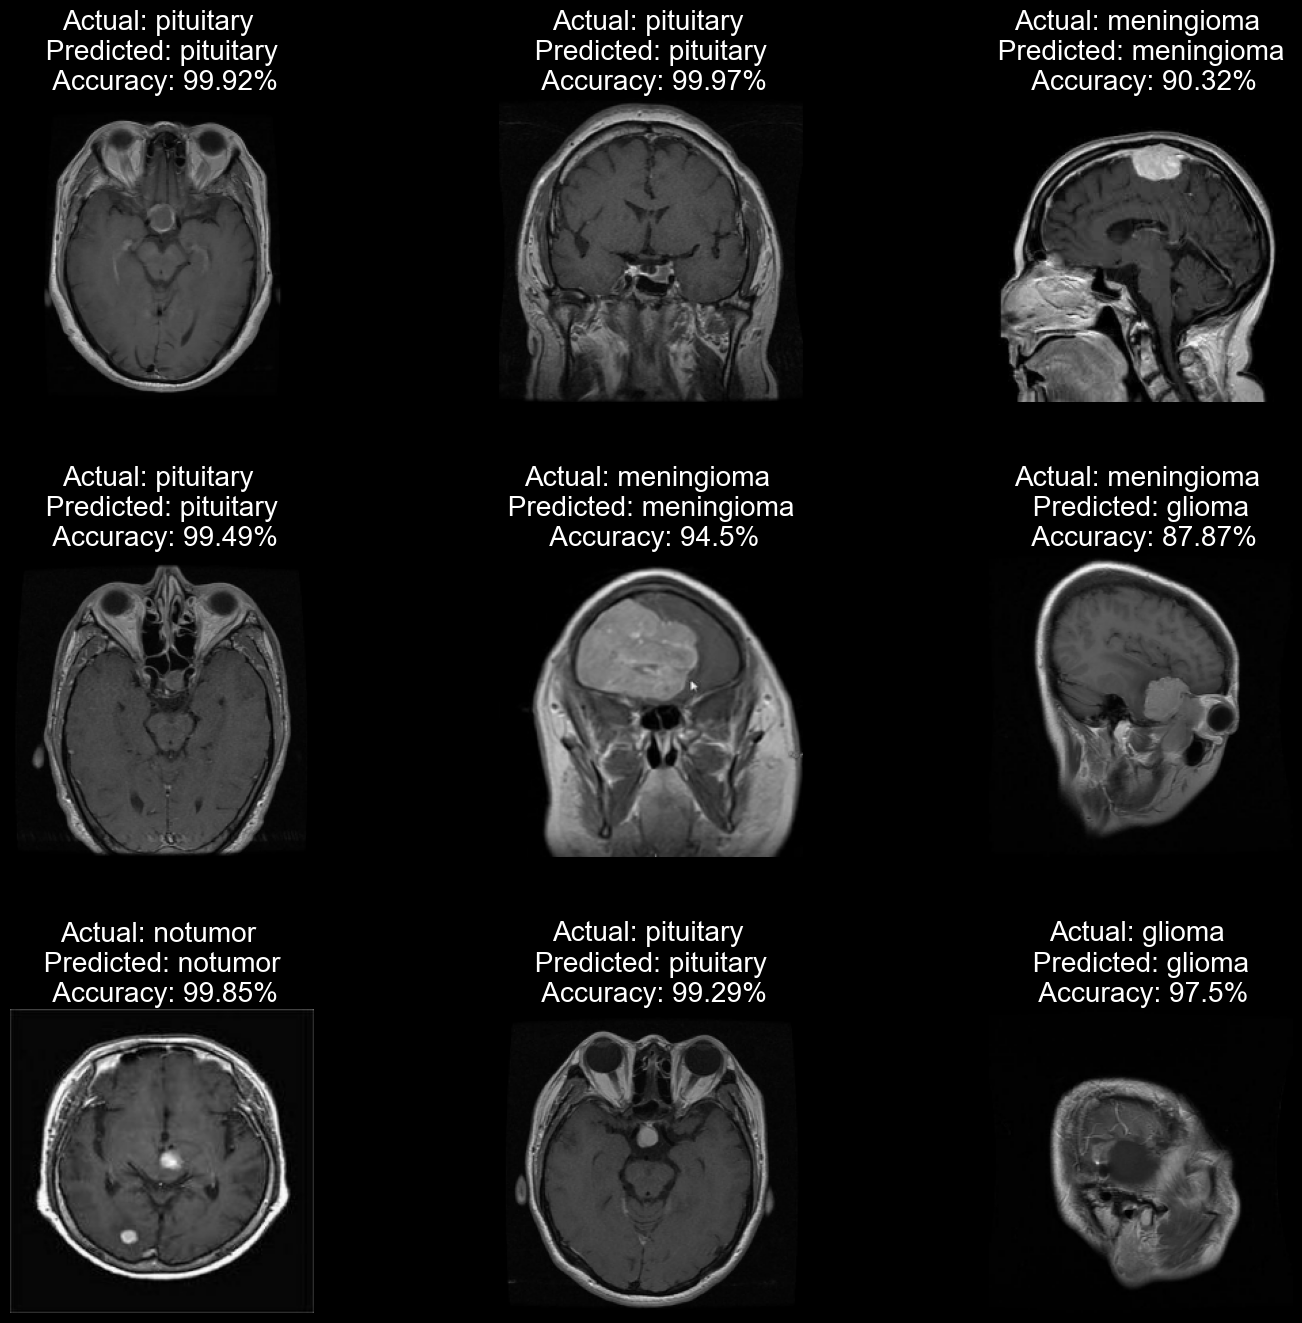

In [59]:
plt.figure(figsize = (15,15))
plt.style.use('dark_background')
for images, labels in true_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Accuracy: {confidence}%")
        plt.axis("off")
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

## CNN MODEL LENET-5

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the image size
image_size = 224

# Construct the LeNet-5 model
model = Sequential()

# Resize input images to match VGG19 input shape
model.add(tf.keras.layers.Resizing(image_size, image_size, interpolation='bilinear', input_shape=(image_size, image_size, 3)))

# Block 1
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

# Output layer
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


/Users/kashishchaturvedi/Downloads/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 220, 220, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 106, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 44944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     5,393,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,406,776 (20.63 MB)

 Trainable params: 5,406,776 (20.63 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
epochs = 10
history = model.fit(x= train_generator, epochs= epochs, verbose= 1, validation_data= valid_generator, 
                    validation_steps= None, shuffle= False)

Epoch 1/10


/Users/kashishchaturvedi/Downloads/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 28s 194ms/step - accuracy: 0.4692 - loss: 71.6944 - val_accuracy: 0.7428 - val_loss: 0.7447
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.8121 - loss: 0.5322 - val_accuracy: 0.8259 - val_loss: 0.5683
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 29s 201ms/step - accuracy: 0.9187 - loss: 0.2681 - val_accuracy: 0.8618 - val_loss: 0.4555
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 207ms/step - accuracy: 0.9520 - loss: 0.1735 - val_accuracy: 0.8898 - val_loss: 0.4114
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 213ms/step - accuracy: 0.9816 - loss: 0.0973 - val_accuracy: 0.8915 - val_loss: 0.4052
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 214ms/step - accuracy: 0.9944 - loss: 0.0582 - val_accuracy: 0.8898 - val_loss: 0.4103
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 221ms/step - accuracy: 0.9963 - loss: 0.0403 - val_accuracy: 0.9020 - val_loss: 0.4075
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - accuracy: 0.9978 - loss: 0.0238 - va

In [20]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

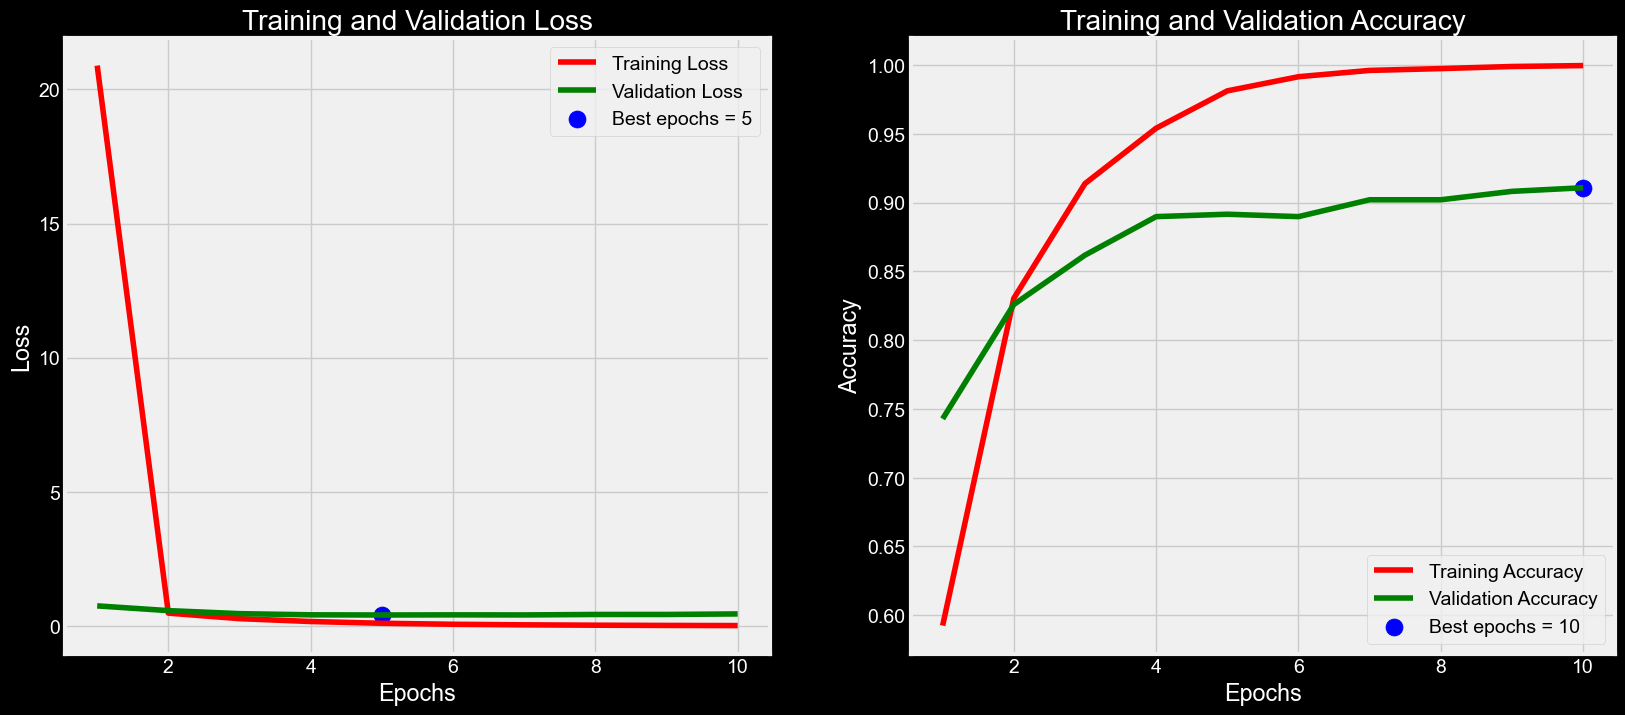

In [21]:
plt.style.use('dark_background')
plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')


plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')

plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')

plt.tight_layout
plt.show();

In [22]:
train_score = model.evaluate(train_generator)
print(f"Training Loss: {train_score[0]}")
print(f"Training Accuracy: {train_score[1]}")

valid_score = model.evaluate(valid_generator)
print(f"Validation Loss: {valid_score[0]}")
print(f" Validation Accuracy: {valid_score[1]}")
test_score = model.evaluate(test_generator)
print(f"Test Loss: {test_score[0]}")
print(f"Test Accuracy: {test_score[1]}")

143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9994 - loss: 0.0087
Training Loss: 0.007472761906683445
Training Accuracy: 0.9997811317443848
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9131 - loss: 0.4477
Validation Loss: 0.44647857546806335
 Validation Accuracy: 0.9107611775398254
 3/41 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9531 - loss: 0.1100

/Users/kashishchaturvedi/Downloads/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9580 - loss: 0.1622
Test Loss: 0.36915552616119385
Test Accuracy: 0.9176201224327087


In [23]:
preds = model.predict_generator(test_generator)

y_pred = np.argmax(preds , axis = 1)

AttributeError: 'Sequential' object has no attribute 'predict_generator'

### CONFUSION MATRIX

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


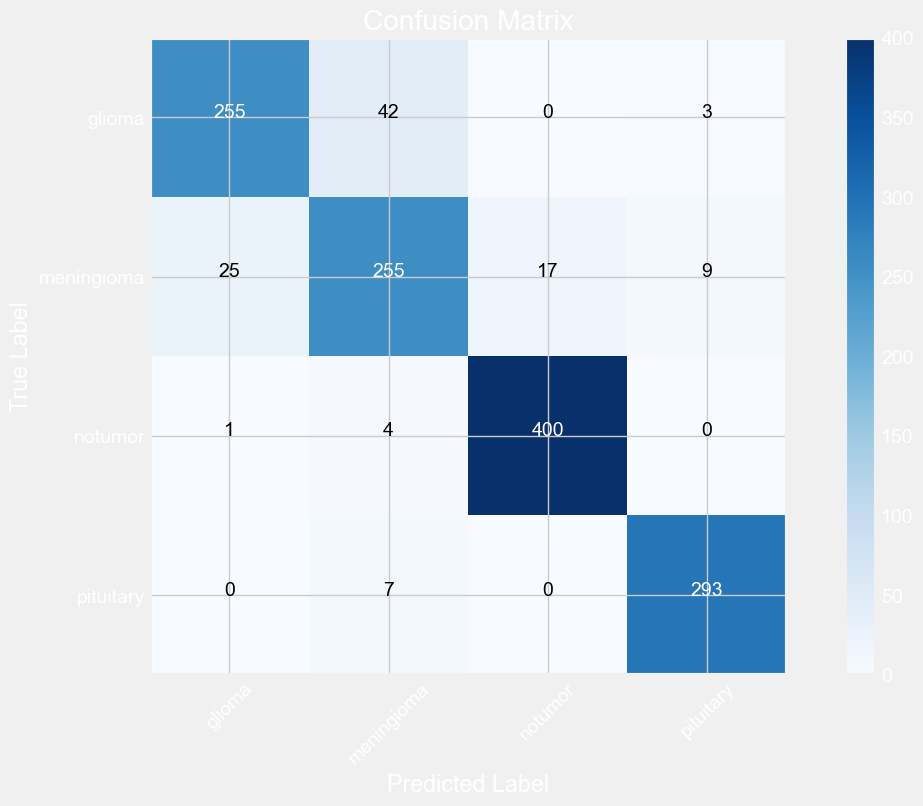

In [26]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming test_generator and model are correctly defined

# Generate predictions using your model
y_pred = model.predict(test_generator)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get class indices from the generator
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_labels)

plt.figure(figsize=(12, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


In [28]:
from sklearn.metrics import classification_report

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate the classification report
print(classification_report(test_generator.classes, y_pred_labels, target_names=classes))


              precision    recall  f1-score   support

      glioma       0.91      0.85      0.88       300
  meningioma       0.83      0.83      0.83       306
     notumor       0.96      0.99      0.97       405
   pituitary       0.96      0.98      0.97       300

    accuracy                           0.92      1311
   macro avg       0.91      0.91      0.91      1311
weighted avg       0.92      0.92      0.92      1311



In [29]:
image_size = 224  # Assuming you want images to be resized to 224x224 pixels
true_test_ds = tf.keras.preprocessing.image_dataset_from_directory (
    test_brain_dataset,
    shuffle = True,
    image_size= (image_size, image_size),
    batch_size = batch_size
)

Found 1311 files belonging to 4 classes.


In [30]:
test_classes = true_test_ds.class_names
test_classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


2024-04-21 21:14:40.218353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


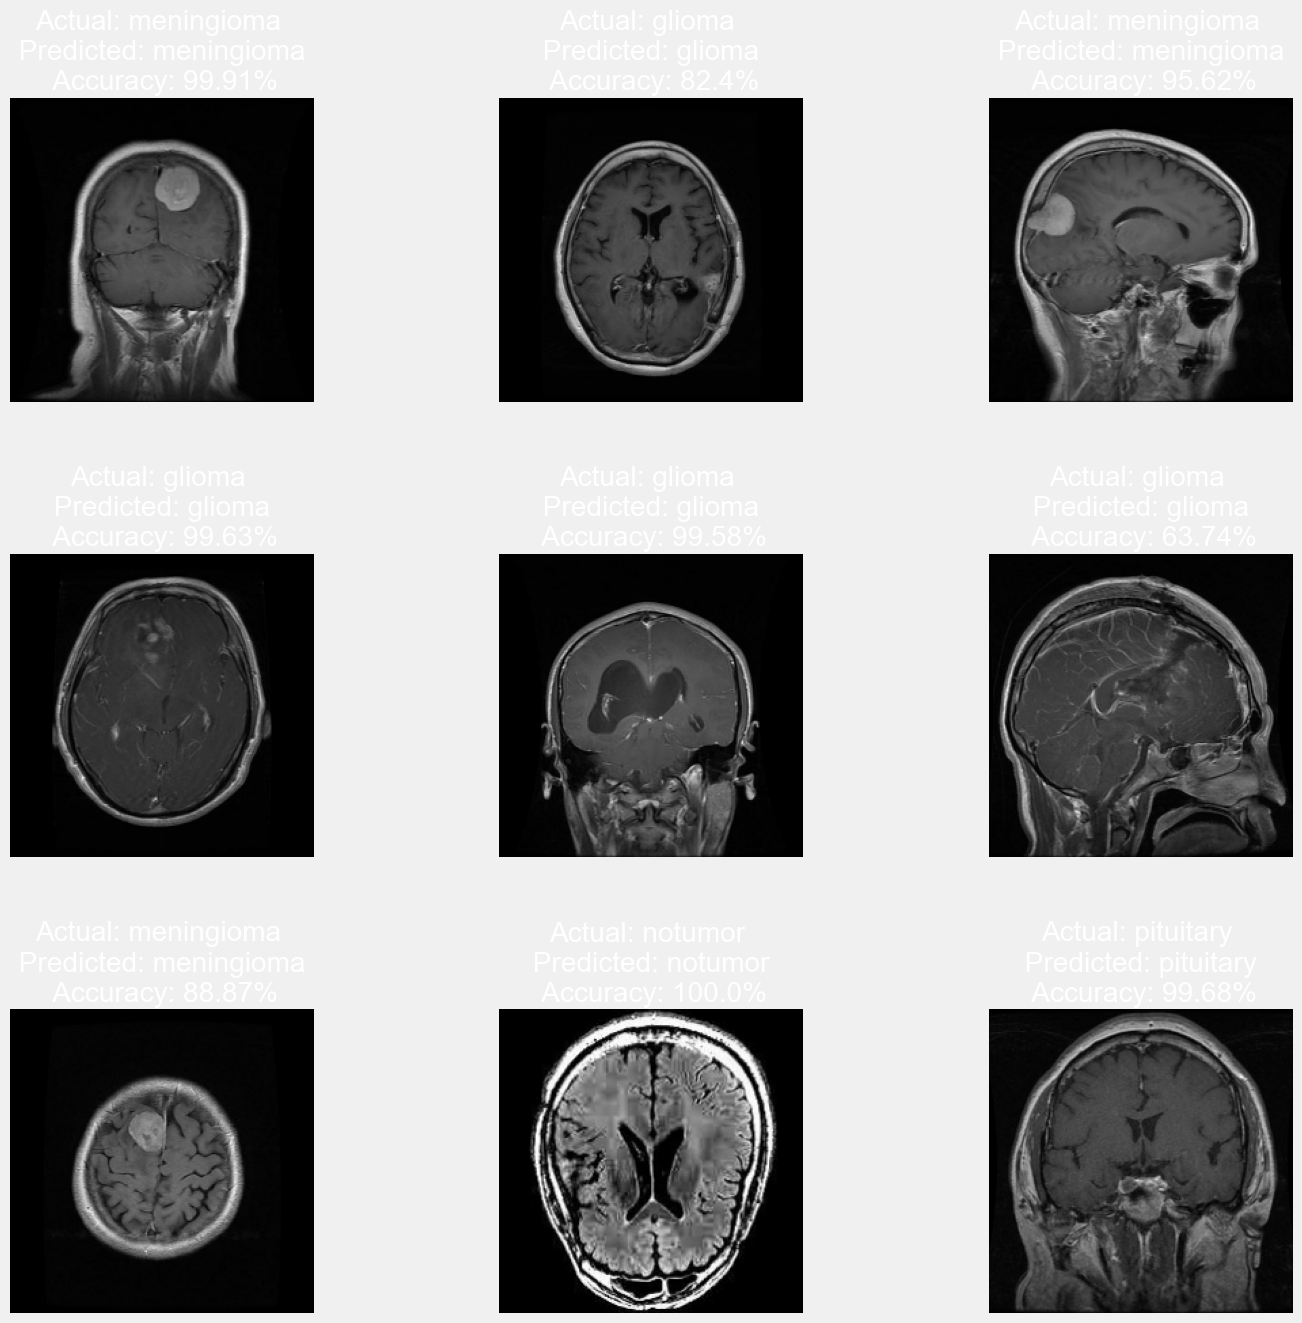

In [32]:
plt.figure(figsize = (15,15))
plt.style.use('dark_background')
for images, labels in true_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Accuracy: {confidence}%")
        plt.axis("off")
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

## ALEXNET

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Resizing

# Define the image size
width = 224
height = 224

# Create AlexNet model
alexnet_model = Sequential([
    # Resizing layer
    Resizing(227, 227, interpolation='bilinear', input_shape=(width, height, 3)),
    
    # 1st Convolutional Layer
    Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    # 2nd Convolutional Layer
    Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    # 3rd Convolutional Layer
    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    
    # 4th Convolutional Layer
    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    
    # 5th Convolutional Layer
    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    Flatten(),
    
    Dense(4096, activation='relu'),
    Dropout(0.5),
    
    Dense(4096, activation='relu'),
    Dropout(0.5),
    
    Dense(4, activation='softmax')
])

# Compile the model
alexnet_model.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

alexnet_model.summary()


/Users/kashishchaturvedi/Downloads/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)           │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,303,236 (222.41 MB)

 Trainable params: 58,300,484 (222.40 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [34]:
epochs = 10
history = alexnet_model.fit(x= train_generator, epochs= epochs, verbose= 1, validation_data= valid_generator, 
                    validation_steps= None, shuffle= False)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 133s 926ms/step - accuracy: 0.5512 - loss: 14.3596 - val_accuracy: 0.4812 - val_loss: 2.9212
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 140s 982ms/step - accuracy: 0.7227 - loss: 0.8566 - val_accuracy: 0.2905 - val_loss: 20.9395
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 142s 996ms/step - accuracy: 0.7013 - loss: 0.9644 - val_accuracy: 0.7218 - val_loss: 0.7166
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.7353 - loss: 0.8321 - val_accuracy: 0.6299 - val_loss: 0.9004
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.7397 - loss: 0.7172 - val_accuracy: 0.7970 - val_loss: 0.5536
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7818 - loss: 0.5690 - val_accuracy: 0.7314 - val_loss: 0.6858
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 140s 980ms/step - accuracy: 0.8006 - loss: 0.5419 - val_accuracy: 0.3946 - val_loss: 3.2407
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 137s 956ms/step - accuracy: 0.8080 - loss: 

In [35]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

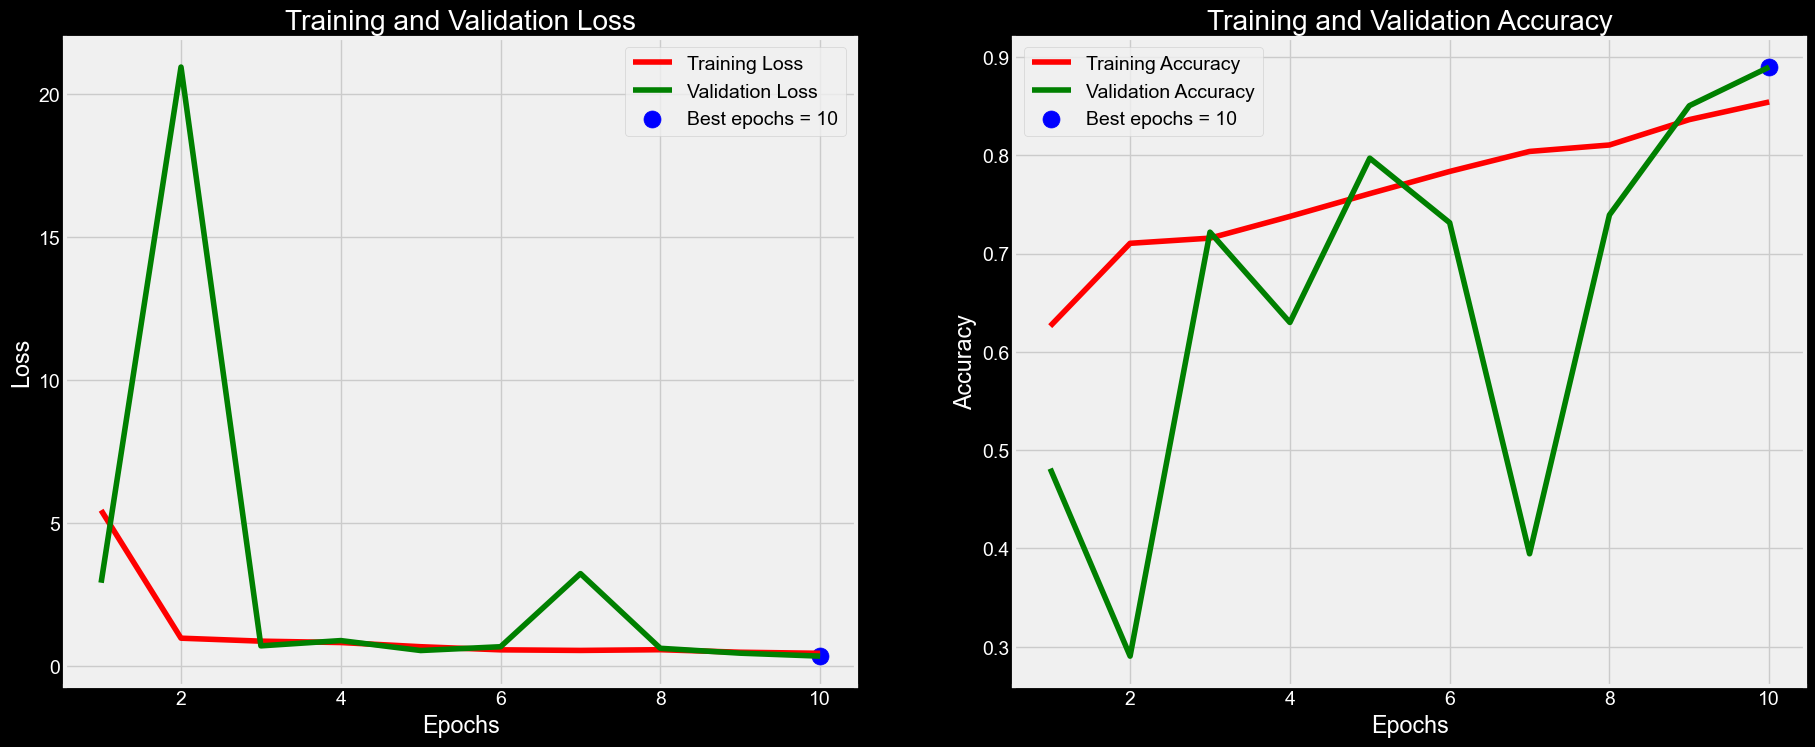

In [36]:
plt.style.use('dark_background')
plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')


plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')

plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')

plt.tight_layout
plt.show();

In [37]:
train_score = alexnet_model.evaluate(train_generator)
print(f"Training Loss: {train_score[0]}")
print(f"Training Accuracy: {train_score[1]}")

valid_score = alexnet_model.evaluate(valid_generator)
print(f"Validation Loss: {valid_score[0]}")
print(f" Validation Accuracy: {valid_score[1]}")
test_score = alexnet_model.evaluate(test_generator)
print(f"Test Loss: {test_score[0]}")
print(f"Test Accuracy: {test_score[1]}")

143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 212ms/step - accuracy: 0.9018 - loss: 0.3064
Training Loss: 0.3152150511741638
Training Accuracy: 0.8962574005126953
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.8875 - loss: 0.3546
Validation Loss: 0.3576818108558655
 Validation Accuracy: 0.8897637724876404
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - accuracy: 0.8962 - loss: 0.2749
Test Loss: 0.4281144440174103
Test Accuracy: 0.8329519629478455


In [39]:
# Use predict method instead of predict_generator
preds = alexnet_model.predict(test_generator)

# Convert predicted probabilities to class labels
y_pred = np.argmax(preds, axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step


## CONFUSION MATRIX

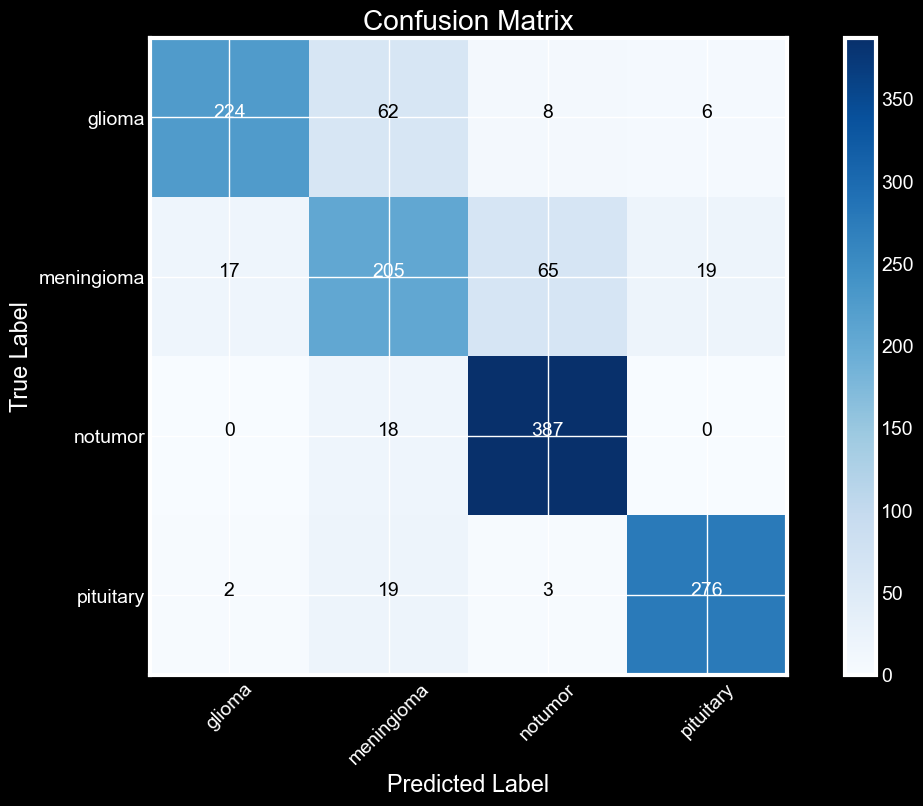

In [40]:
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.style.use('dark_background')
plt.figure(figsize= (12, 8))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [42]:
from sklearn.metrics import classification_report

# Assuming test_generator and y_pred are defined
# Assuming classes is defined as well

# Generate the classification report
print(classification_report(test_generator.classes, y_pred, target_names=classes))


              precision    recall  f1-score   support

      glioma       0.92      0.75      0.83       300
  meningioma       0.67      0.67      0.67       306
     notumor       0.84      0.96      0.89       405
   pituitary       0.92      0.92      0.92       300

    accuracy                           0.83      1311
   macro avg       0.84      0.82      0.83      1311
weighted avg       0.84      0.83      0.83      1311



In [43]:
image_size = 224  # Assuming you want images to be resized to 224x224 pixels
true_test_ds = tf.keras.preprocessing.image_dataset_from_directory (
    test_brain_dataset,
    shuffle = True,
    image_size= (image_size, image_size),
    batch_size = batch_size
)

Found 1311 files belonging to 4 classes.


In [44]:
test_classes = true_test_ds.class_names
test_classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


2024-04-21 21:42:17.741871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


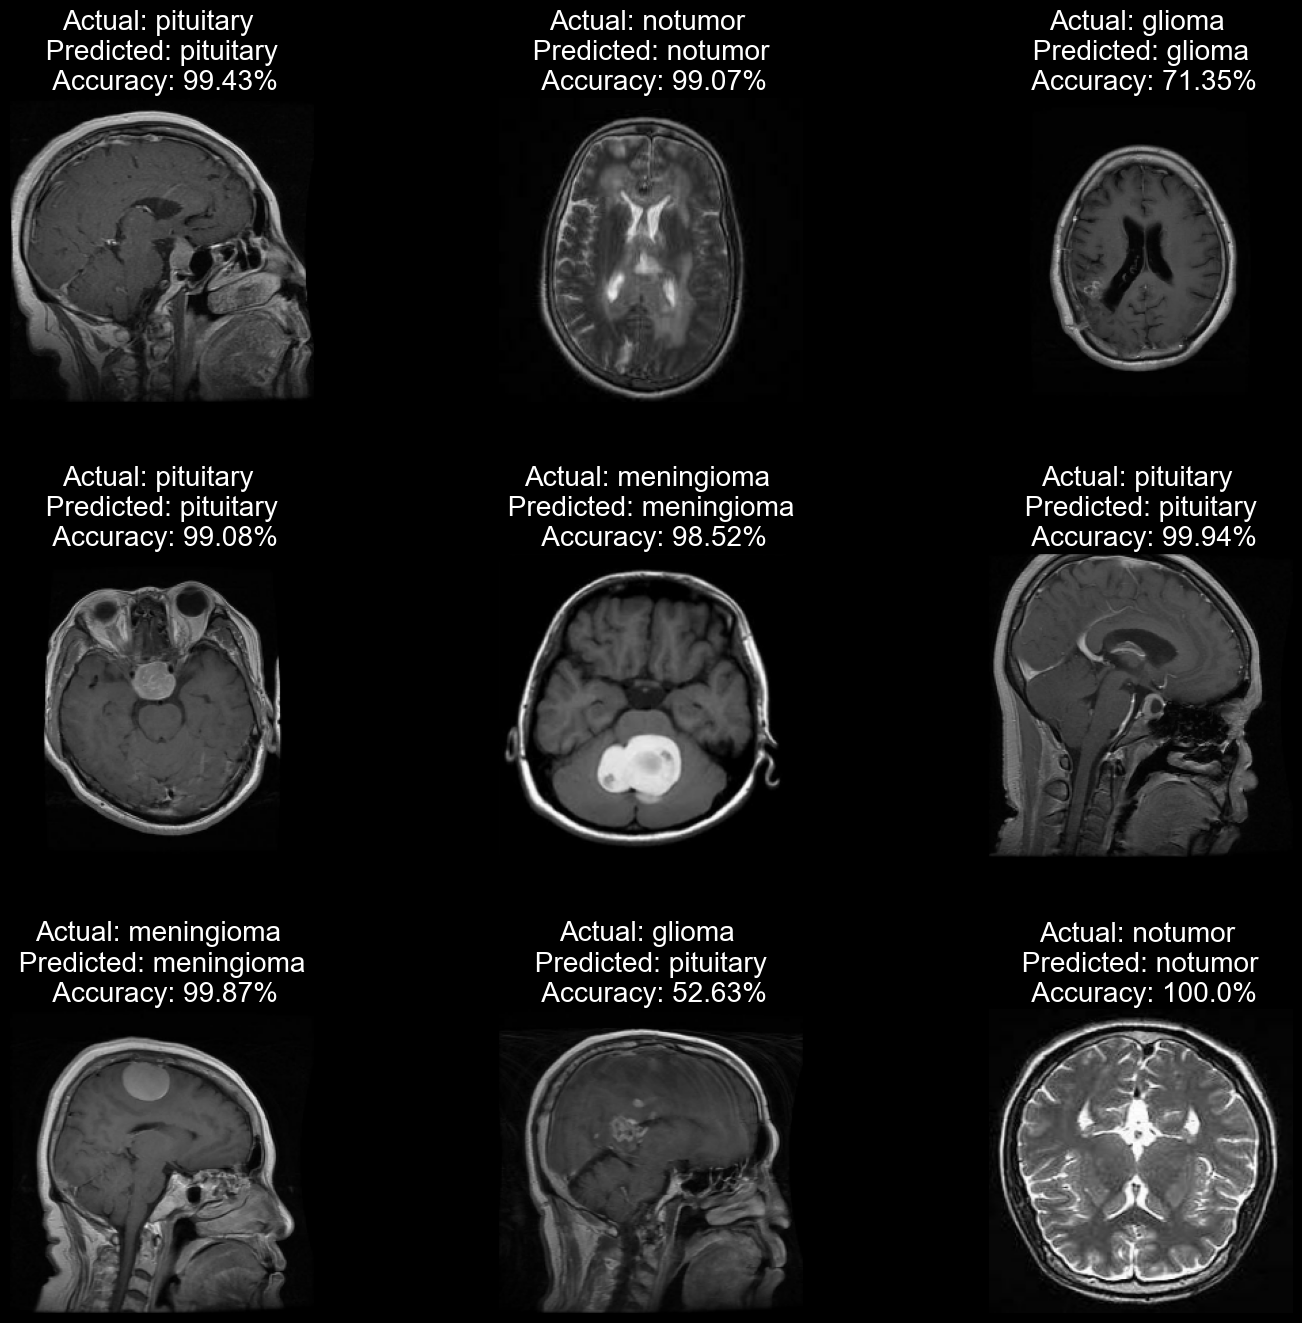

In [46]:
plt.figure(figsize = (15,15))
plt.style.use('dark_background')
for images, labels in true_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Accuracy: {confidence}%")
        plt.axis("off")
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()